# Data analysis of a 2AFC task

In [48]:
# Modifiable variables when changing computer location:
# Directory where the images will be stored:
directory_images = '/home/emma/github/TFG/results/fit_model/'
directory_functions = '/home/emma/github/TFG/functions'
directory_data = '/home/emma/github/TFG/data/'
directory_results = '/home/emma/github/TFG/results/'

In [49]:
# Importing all the libraries that will be used
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import json 
from sklearn.linear_model import LinearRegression
import sys
import datetime
import pandas as pd

# Insert path where the functions are stored
sys.path.insert(1, directory_functions)

# Importing the functions that will be used
import rat_functions1 as rf
import help_plot as hp

## Storing the data into variables

In [50]:
# Name of the rats
rats = ["Rat 24 05 sec","Rat 25 05 sec","Rat 36 05 sec", "Rat 37 05 sec","Rat 25 1 sec"," Rat 35 1 sec","Rat 37 1 sec"]

In [51]:
# # Open processed data and store data into variables
# with open(directory_data+"processed_data.json","r") as f:
#     data = json.load(f)
#     stimulus = data[0]             # Data frames obtained from a gaussian distribution of a determined coherence
#     coherences = data[1]         # Target coherences used for each trial
#     rewards = data[2]              # Correct choice side
#     decisions = data[3]            # Actual decision made by the rat each trial
#     performances = data[4]     # 0 if the rat chose the correct choice, 1 if the rat chose the incorrect choice
#     target_sigmas = data[5]     # Target sigma to use for each trial

## Storing the fit data

In [52]:
PR_total = []
param_fits = []
ci_rats = []
for rat in ["rat24","rat25","rat36","rat37"]:

    # Opening JSON file 
    f = open(directory_results+'model_fitStLogTimePi/'+rat+'_05sec.json',) 
    # returns JSON object as  
    # a dictionary 
    data = json.load(f) 
    f.close()
    print(data.keys())
    data = pd.DataFrame(data)
    index_min=[]
    imin1=data["LL_training"].idxmin()
    #print(df.loc[imin1]["LL_training"])
    LL=data.loc[imin1]["LL_training"]
    param_fits.append(data.loc[imin1]["param_all"])
    ci_rats.append(data.loc[imin1]["ci"])
    if rat=="rat1":
        data.loc[imin1]["LL_training"]
        #Nparam[model].append(len(df.loc[imin1]["param_fit"]))
        Nparam = len(data.loc[imin1]["param_fit"])
    print(data.loc[imin1]["param_all"])
    PR_total.append(data.loc[imin1]["PR_training"])
    
for rat in ["rat25","rat35","rat37"]:

    # Opening JSON file 
    f = open(directory_results+'model_fitStLogTimePi/'+rat+'_1sec.json',) 
    # returns JSON object as  
    # a dictionary 
    data = json.load(f) 
    f.close()
    data = pd.DataFrame(data)
    index_min=[]
    imin1=data["LL_training"].idxmin()
    #print(df.loc[imin1]["LL_training"])
    LL=data.loc[imin1]["LL_training"]
    param_fits.append(data.loc[imin1]["param_all"])
    ci_rats.append(data.loc[imin1]["ci"])
    if rat=="rat1":
        data.loc[imin1]["LL_training"]
        #Nparam[model].append(len(df.loc[imin1]["param_fit"]))
        Nparam = len(data.loc[imin1]["param_fit"])
    print(data.loc[imin1]["param_all"])
    PR_total.append(data.loc[imin1]["PR_training"])
# param_fits = np.delete(param_fits,2,0)
# PR_total = np.delete(PR_total,2,0)

dict_keys(['param_all', 'LL_training', 'ci', 'hessian', 'param_fit', 'PR_training'])
{'st': [0.6367835821270214, 0.2455002622252082, -0.003599900997828985, 0.0], 'sigma_a': [1.0], 'x0': [0.0, 0.0], 'bias_d': [0.0], 'hbias_d': [0.0]}
dict_keys(['param_all', 'LL_training', 'ci', 'hessian', 'param_fit', 'PR_training'])
{'st': [0.6673489235672739, 0.6484882582678768, -0.04546450758012691, 0.0], 'sigma_a': [1.0], 'x0': [0.0, 0.0], 'bias_d': [0.0], 'hbias_d': [0.0]}
dict_keys(['param_all', 'LL_training', 'ci', 'hessian', 'param_fit', 'PR_training'])
{'st': [0.6234639823934293, 0.14808659369721508, 0.016712750573440946, 0.0], 'sigma_a': [1.0], 'x0': [0.0, 0.0], 'bias_d': [0.0], 'hbias_d': [0.0]}
dict_keys(['param_all', 'LL_training', 'ci', 'hessian', 'param_fit', 'PR_training'])
{'st': [0.7599501801096614, 0.17153460569348586, 0.02970958338138475, 0.0], 'sigma_a': [1.0], 'x0': [0.0, 0.0], 'bias_d': [0.0], 'hbias_d': [0.0]}
{'st': [0.7036695199449228, 0.7015633427253789, -0.031769150822216825,

## Open fit stimulus

In [53]:
stimulus =[]
coherences = []
target_sigmas =[]
rewards = []
performances = []
choices = []
dates = []
n_total_stimulus = []
for rat in [24,25,36,37]:
    print(rat)
    # Opening JSON file 
    f = open(directory_data+'processed_data_rat'+str(rat)+'_dataset2_05.json',) 
    # returns JSON object as  
    # a dictionary 
    data = json.load(f) 
    f.close()
    stimulus.append(data["stim_10"])
    coherences.append(data["coherences_10"])
    rewards.append(data["rewards_10"])
    target_sigmas.append(data["sigma_10"])
    choices.append(data["choices_10"])
    dates.append(data["date_10"])
    n_total_stimulus.append(data["n_stim_10"])
    performances.append(data["performance_10"])
    print(data.keys())
    
for rat in [25,35,37]:
    print(rat)
    # Opening JSON file 
    f = open(directory_data+'processed_data_rat'+str(rat)+'_dataset2_1.json',) 
    # returns JSON object as  
    # a dictionary 
    data = json.load(f) 
    f.close()
    stimulus.append(data["stim_20"])
    coherences.append(data["coherences_20"])
    rewards.append(data["rewards_20"])
    target_sigmas.append(data["sigma_20"])
    choices.append(data["choices_20"])
    print(len(data["stim_20"]))
    dates.append(data["date_20"])
    n_total_stimulus.append(data["n_stim_20"])
    performances.append(data["performance_20"])


24
dict_keys(['date_10', 'coherences_10', 'stim_20', 'n_stim_20', 'rewards_10', 'performance_10', 'sigma_10', 'rewards_20', 'stim_10', 'performance_20', 'choices_10', 'coherences_20', 'n_stim_10', 'sigma_20', 'date_20', 'choices_20'])
25
dict_keys(['date_10', 'coherences_10', 'stim_20', 'n_stim_20', 'rewards_10', 'performance_10', 'sigma_10', 'rewards_20', 'stim_10', 'performance_20', 'choices_10', 'coherences_20', 'n_stim_10', 'sigma_20', 'date_20', 'choices_20'])
36
dict_keys(['date_10', 'coherences_10', 'stim_20', 'n_stim_20', 'rewards_10', 'performance_10', 'sigma_10', 'rewards_20', 'stim_10', 'performance_20', 'choices_10', 'coherences_20', 'n_stim_10', 'sigma_20', 'date_20', 'choices_20'])
37
dict_keys(['date_10', 'coherences_10', 'stim_20', 'n_stim_20', 'rewards_10', 'performance_10', 'sigma_10', 'rewards_20', 'stim_10', 'performance_20', 'choices_10', 'coherences_20', 'n_stim_10', 'sigma_20', 'date_20', 'choices_20'])
25
73180
35
142060
37
109820


In [54]:
for i in range(len(stimulus)):
    if i < 4:
        stimulus[i] = (np.reshape(stimulus[i],(int(len(stimulus[i])/10),10)))
        print(len(choices[i]),len(stimulus[i]))
    else:
        stimulus[i] = (np.reshape(stimulus[i],(int(len(stimulus[i])/20),20)))
        print(len(choices[i]),len(stimulus[i]))        
#     print(len(np.transpose(np.reshape(stimulus[i],(10,int(len(stimulus[i])/10))))))

25238 25238
5016 5016
17869 17869
7374 7374
3659 3659
7103 7103
5491 5491


In [55]:
print(stimulus[0][0])

[ 0.3858   0.1148   0.00349 -0.08948 -0.6865   0.3027   0.04811 -0.2576
 -0.1876  -0.1937 ]


In [56]:
# PR_total = []
# for i in range(len(rats)):
#     # Opening JSON file 
#     f = open(directory_results+'1model10C2St1St2Sig/PR_Rat'+str(i+1)+'.json',) 
#     # returns JSON object as  
#     # a dictionary 
#     data = json.load(f) 
    
#     f.close()
#     PR_total.append(data["PR"])

In [57]:
print(len(PR_total[2]))

17869


In [58]:
len(coherences[2])

17869

In [59]:
len(stimulus[3][0])

10

In [60]:
choices_fit = []
for rat in range(len(rats)):
    choices1 = []
    for prob in PR_total[rat]:
        if np.random.rand() < prob:
            choices1.append(1)
        else:
            choices1.append(0)
    choices_fit.append(choices1)

In [61]:
months = []
for rat in range(len(rats)):
    months.append(len(rf.count(dates[rat]))/31)
print(months)

[2.0, 0.5483870967741935, 1.4838709677419355, 1.1612903225806452, 0.5483870967741935, 0.6451612903225806, 1.1935483870967742]


## Segment data

In [62]:
# for rat in range(len(rats)):
#     acc = []
#     div = 4*7
#     tick = []
#     counter = 0
#     for i in range(int(months[rat]*div)):
#         print(len(performances))
#         s_performances = performances[rat][int((n_total_stimulus[rat]/(months[rat]*div))*i):int((n_total_stimulus[rat]/(months[rat]*div))*(i+1))]
#         s_dates = dates[rat][int((n_total_stimulus[rat]/(months[rat]*div))*i):int((n_total_stimulus[rat]/(months[rat]*div))*(i+1))]
#         acc.append(sum(s_performances)/len(s_performances))
#         counter +=1
#         if counter == 20:
#             tick.append(s_dates[0][3:])
#             counter = 0
#     tick.append(s_dates[len(s_dates)-1][3:])
#     plt.figure()
#     plt.title(rats[rat]+" accuracy")
#     plt.plot(np.arange(0,int(months[rat]*div),1),acc)
#     plt.ylim([0,1])
#     plt.xticks(np.arange(0,(len(tick))*20,np.round((len(acc)/(len(tick)-1)),2)),tick,rotation = "vertical")

#     plt.ylabel("accuracy")

In [63]:
# i = 1
# t = 2
# # end = len(stimulus)-1
# stimulus = [stimulus[a][1000:len(stimulus[a])-1] for a in range(len(stimulus))]
# # stimulus_test = stimulus[:][8000:10000]
# coherences = [coherences[a][1000:len(stimulus[a])-1] for a in range(len(coherences))]
# # coherences_test = coherences[:][8000:10000]
# target_sigmas = [target_sigmas[a][1000:len(stimulus[a])-1] for a in range(len(target_sigmas))]
# # target_sigmas_test = target_sigmas[:][8000:10000]
# rewards =[rewards[a][1000:len(stimulus[a])-1] for a in range(len(rewards))]
# # rewards_test = rewards[:][8000:10000]
# performances =[performances[a][1000:len(stimulus[a])-1] for a in range(len(performances))]
# # performances_test = performances[:][8000:10000]
# choices = [choices[a][1000:len(stimulus[a])-1] for a in range(len(choices))]
# # choices_test = choices[:][8000:10000]
# choices_fit = [choices_fit[a][1000:len(stimulus[a])-1] for a in range(len(choices_fit))]

In [64]:
i = 1
# t = 2
# # end = len(stimulus)-1
# stimulus = [stimulus[a][10000:len(stimulus[a])] for a in range(len(stimulus))]
# # stimulus_test = stimulus[:][8000:10000]
# coherences = [coherences[a][10000:len(stimulus[a])] for a in range(len(coherences))]
# # coherences_test = coherences[:][8000:10000]
# target_sigmas = [target_sigmas[a][10000:len(stimulus[a])] for a in range(len(target_sigmas))]
# # target_sigmas_test = target_sigmas[:][8000:10000]
# rewards =[rewards[a][10000:len(stimulus[a])] for a in range(len(rewards))]
# # rewards_test = rewards[:][8000:10000]
# performances =[performances[a][10000:len(stimulus[a])] for a in range(len(performances))]
# # performances_test = performances[:][8000:10000]
# choices = [choices[a][10000:len(stimulus[a])] for a in range(len(choices))]
# # choices_test = choices[:][8000:10000]
# choices_fit = [choices_fit[a][10000:len(stimulus[a])] for a in range(len(choices_fit))]

In [65]:
len(stimulus[0])

25238

In [66]:
len(choices_fit[0])

25238

KeyError: 'c2'

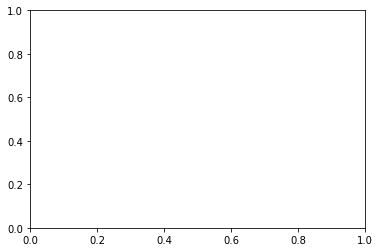

In [67]:
for rat in range(len(rats)):
    fig,axs = plt.subplots()
    pote = [-(1.5)*x-(param_fits[rat]["c2"][0]/2.)*x**2+(1/4.)*param_fits[rat]["c4"][0]*x**4 for x in np.arange(-20,20,1)/10]
    axs.plot(pote,linewidth = 4)
    fig.suptitle("Decision module: DW",fontsize = 20)
    axs.yaxis.set_visible(False)
    axs.xaxis.set_visible(False)
    axs.spines["top"].set_visible(False)
    axs.spines["bottom"].set_visible(False)
    axs.spines["left"].set_visible(False)
    axs.spines["right"].set_visible(False)

## Possible model

In [ ]:
#Logistic DW TIME
for rat in range(len(rats)):
    ind = 0
    leg = []
    fig,axs1 = plt.subplots()
    for param in param_fits[rat]:
        for p in range(len(param_fits[rat][param])):
            if param_fits[rat][param][p]!=0:
                if param_fits[rat][param][p]!=1:
                    leg.append(param+" "+str(p))
                    axs1.errorbar(ind,param_fits[rat][param][p],yerr=ci_rats[rat][ind],marker ="o",label = param + str(p))
                    ind +=1
    axs1.set_xticks([0,1,2])
    axs1.set_xticklabels(["A",r"$\beta$",r"$\beta_t$"],fontsize = 20)
    plt.yticks(fontsize = 20)
    fig.suptitle("Parameters fit", fontsize = 20)
    axs1.spines["top"].set_visible(False)
    axs1.spines["right"].set_visible(False)
    axs1.hlines(0,0,2,linestyle="dashed",color="grey")
    axs1.set_ylim([-0.5,2])
#     axs1.set_xticks([-0.2])
#     axs1.set_xlim([-0.1,1])
#     axs1.set_title("c2")

In [68]:
# st3 = [[0],[0],[0],[0],[0]]
# st4 = [[0],[0],[0],[0],[0]]
print(param_fits[0])

{'st': [0.6367835821270214, 0.2455002622252082, -0.003599900997828985, 0.0], 'sigma_a': [1.0], 'x0': [0.0, 0.0], 'bias_d': [0.0], 'hbias_d': [0.0]}


In [69]:
#stimulus transformation 
transformed_stimulus = []
for rat in range(len(rats)):
    stimulus_transf = []
    st1 = param_fits[rat]["st"][0]
    st2 = param_fits[rat]["st"][1]
    st3 =  param_fits[rat]["st"][2]
    st4 =  param_fits[rat]["st"][3]
    for stim in stimulus[rat]:
        s_trans = []
        for iframe in range(len(stim)):

            s_trans.append((1/st1)*(1.0/(1+np.exp(-( (1/(st2+st3*(iframe-1)) )*stim[iframe] ) ) )-0.5 ))

           
        stimulus_transf.append(s_trans)
    transformed_stimulus.append(stimulus_transf)

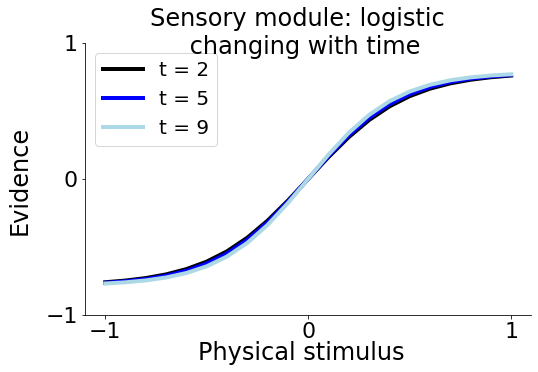

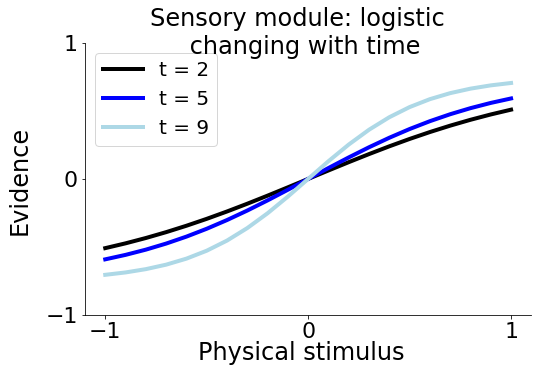

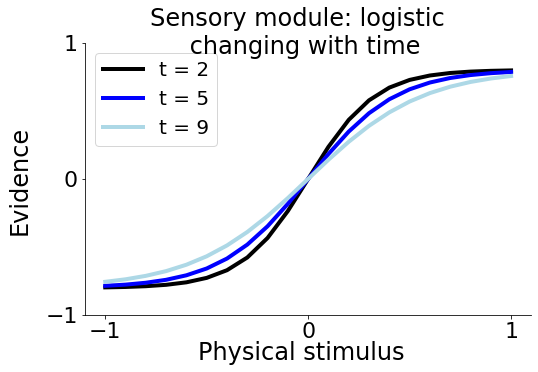

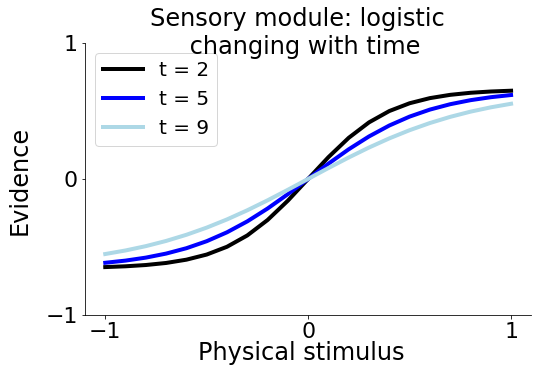

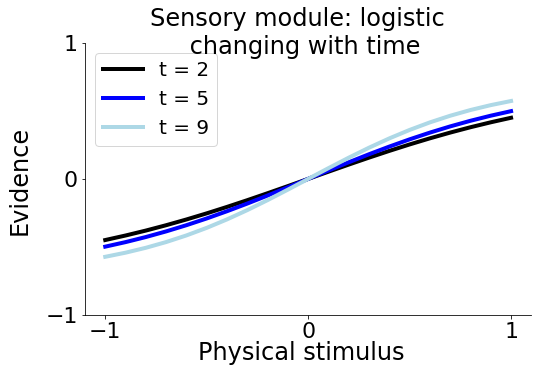

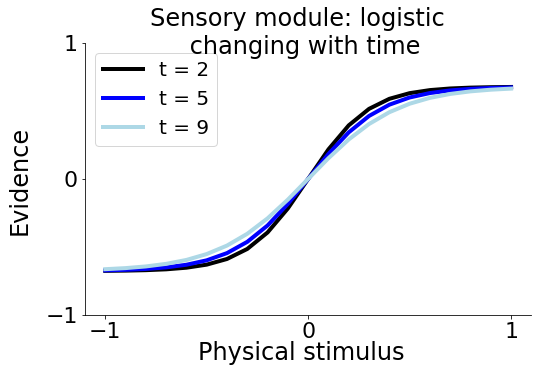

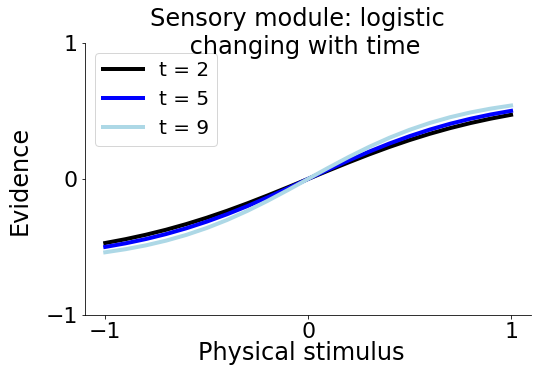

In [70]:
colors = ["k","blue","lightblue"]
for rat in range(len(rats)):
    st1 = param_fits[rat]["st"][0]
    st2 = param_fits[rat]["st"][1]
    st2 = param_fits[rat]["st"][1]
    st3 =  param_fits[rat]["st"][2]
    #st4 =  param_fits[rat]["st"][3]
    fig,axs = plt.subplots(figsize = (8,5))
    c = 0
    for t in [2,5,9]:
        s_trans = []
        for ph_stim in np.arange(-10,11,1):
            frame = ph_stim/10
            s_trans.append((1/st1)*(1.0/(1+np.exp(-( (1/(st2+st3*(t-1)) )*frame ) ) )-0.5 ))
            

        axs.plot(np.arange(-10,11,1)/10,s_trans,colors[c],linewidth = 4, label = "t = "+str(t))
        c += 1
        hp.remove_axis(axs)
#         plt.ylim([-1,1])
    fig.suptitle("Sensory module: logistic \n changing with time", fontsize = 24)
    fig.text(0.5, 0, "Physical stimulus", ha='center',fontsize =24)
    fig.text(-0.01, 0.5, "Evidence", va='center', rotation='vertical',fontsize = 24)
    plt.xticks([-1,0,1],fontsize = 22)
    plt.yticks([-1,0,1],fontsize=22)
    plt.legend(fontsize = 20)

## Separing the data by coherences (real and target)
### Separing the data by target coherences

In [71]:
# Will compute a vector with the target coherences used for each rat
coherence_vectors = [] # coherence_vectors[rat][coherence]

for coh in coherences:
    coh_vec = rf.return_coherences_vector(coh)
    coherence_vectors.append(coh_vec)

In [72]:
coherence_vectors

[[-1.0, -0.5, -0.15, 0.0, 0.15, 0.5, 1.0],
 [-1.0, -0.5, -0.15, 0.0, 0.15, 0.5, 1.0],
 [-1.0, -0.5, -0.15, 0.0, 0.15, 0.5, 1.0],
 [-1.0, -0.5, -0.15, 0.0, 0.15, 0.5, 1.0],
 [-1.0, -0.5, -0.15, 0.0, 0.15, 0.5, 1.0],
 [-1.0, -0.5, -0.15, 0.0, 0.15, 0.5, 1.0],
 [-1.0, -0.5, -0.15, 0.0, 0.15, 0.5, 1.0]]

In [73]:
# The stimulus, coherences, rewards, decisions, performances and target sigmas will be divided by coherences
results_divided_coherence = [] # The vector will be organized as follows: 
                                                  # results_divided_coherence[rat][coherence]=[rewards, decisions, performances, stimulus, target_sigmas]

for rat in range(len(rats)):
    divided_coherence = []
    for coherence in coherence_vectors[rat]:
        divided_coherence.append(rf.divide_coh(coherences[rat],rewards[rat],choices[rat],performances[rat],stimulus[rat],target_sigmas[rat],coherence))
    results_divided_coherence.append(divided_coherence)


In [74]:
len(choices_fit[0])

25238

In [75]:
# The stimulus, coherences, rewards, decisions, performances and target sigmas will be divided by coherences
results_divided_coherence_fit = [] # The vector will be organized as follows: 
                                                  # results_divided_coherence[rat][coherence]=[rewards, decisions, performances, stimulus, target_sigmas]

for rat in range(len(rats)):
    divided_coherence = []
    for coherence in coherence_vectors[rat]:
        divided_coherence.append(rf.divide_coh(coherences[rat],rewards[rat],choices_fit[rat],performances[rat],stimulus[rat],target_sigmas[rat],coherence))
    results_divided_coherence_fit.append(divided_coherence)

In [76]:
len(results_divided_coherence_fit)

7

In [77]:
# The percentages, the number of trials and the coherence vectors avobe x trials will be stored into the following variables for each rat:
percentages = [] # percentages[rat][strong_coherence]
total_number_trials = [] # total_number_trials[rat][strong_coherence]
strong_coherence_vectors = [] # strong_coherence_vectors[rat] coherences which have more than 2500 trials

n_trials_threshold = 100 # Only the coherences which have avobe n_trials_threshold will be used

for rat in range(len(rats)):
    perc = []
    number_trials = []
    coh_vector = []
    # for each coherence which has more than n_trials_threshold, the percentage of right choice will be computed
    for i in range(len(results_divided_coherence[rat])):
        if len(results_divided_coherence[rat][i][1]) > n_trials_threshold:
            perc.append(sum(results_divided_coherence[rat][i][1])/len(results_divided_coherence[rat][i][1]))
            coh_vector.append(coherence_vectors[rat][i])
            number_trials.append(len(results_divided_coherence[rat][i][1]))
    percentages.append(perc)
    total_number_trials.append(number_trials)
    strong_coherence_vectors.append(coh_vector)

In [78]:
# The percentages, the number of trials and the coherence vectors avobe x trials will be stored into the following variables for each rat:
percentages_fit = [] # percentages[rat][strong_coherence]
total_number_trials_fit = [] # total_number_trials[rat][strong_coherence]
strong_coherence_vectors_fit = [] # strong_coherence_vectors[rat] coherences which have more than 2500 trials

n_trials_threshold = 100 # Only the coherences which have avobe n_trials_threshold will be used

for rat in range(len(rats)):
    perc = []
    number_trials = []
    coh_vector = []
    # for each coherence which has more than n_trials_threshold, the percentage of right choice will be computed
    for i in range(len(results_divided_coherence_fit[rat])):
        if len(results_divided_coherence_fit[rat][i][1]) > n_trials_threshold:
            perc.append(sum(results_divided_coherence_fit[rat][i][1])/len(results_divided_coherence_fit[rat][i][1]))
            coh_vector.append(coherence_vectors[rat][i])
            number_trials.append(len(results_divided_coherence[rat][i][1]))
    percentages_fit.append(perc)
    total_number_trials_fit.append(number_trials)
    strong_coherence_vectors_fit.append(coh_vector)

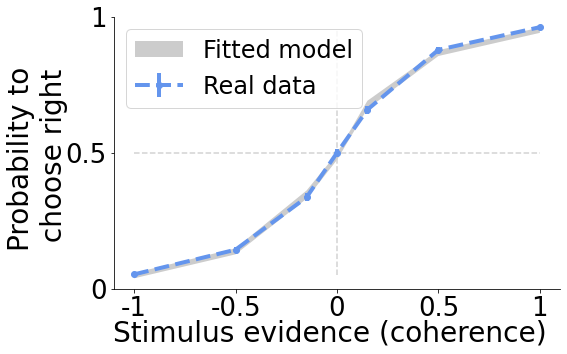

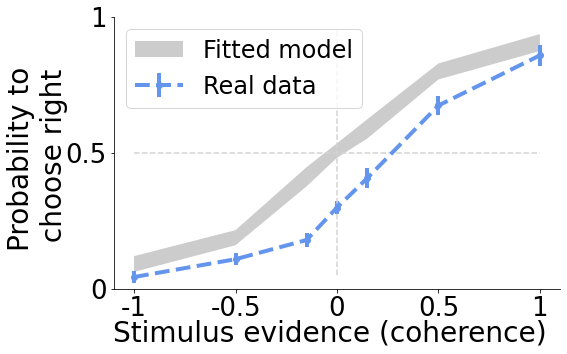

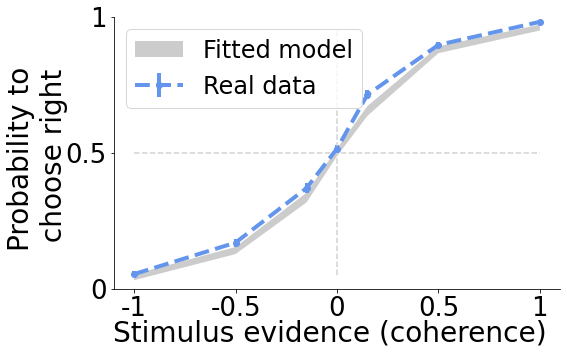

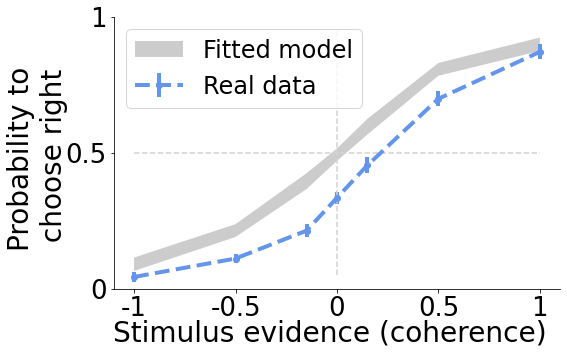

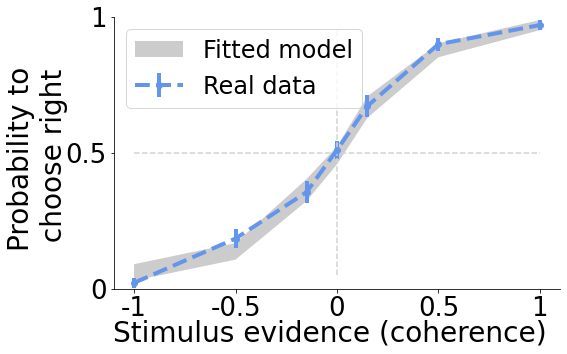

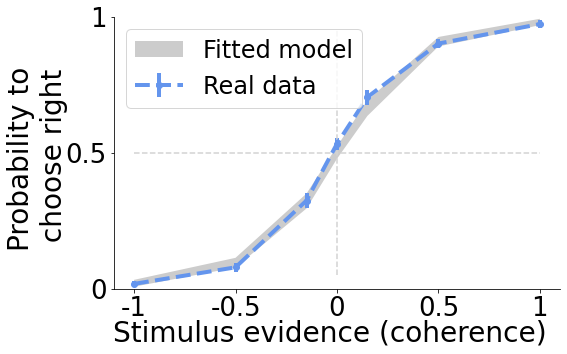

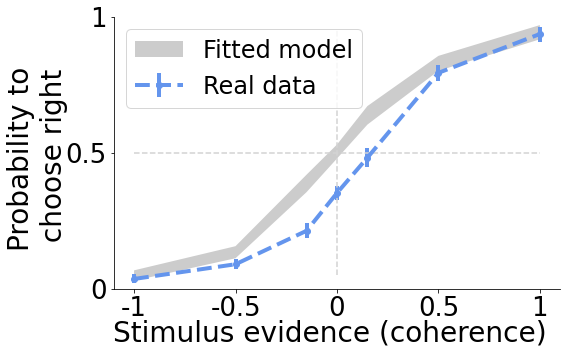

In [79]:
# For each rat, plot the psychometric curve with the coherence values which have above x trials
# fig, axs = plt.subplots(figsize = (8,5))
for rat in range(len(rats)):
    fig, axs = plt.subplots(figsize = (8,5))
    # Computing the confidence intervals (95%)
    z = 1.96
    conf_int = [[percentages[rat][i]-z*(np.sqrt((percentages[rat][i]*(1-percentages[rat][i]))/total_number_trials[rat][i])) for i in range(len(total_number_trials[rat]))],
                [percentages[rat][i]+z*(np.sqrt((percentages[rat][i]*(1-percentages[rat][i]))/total_number_trials[rat][i])) for i in range(len(total_number_trials[rat]))]]
    conf_int = [[percentages[rat][i]-conf_int[0][i] for i in range(len(percentages[rat]))],[conf_int[1][i]-percentages[rat][i] for i in range(len(percentages[rat]))]]
    axs.errorbar(strong_coherence_vectors[rat],percentages[rat],conf_int,marker='o',label = "Real data", color ="cornflowerblue",linewidth=4,linestyle="dashed")
    conf_int = [[percentages_fit[rat][i]-z*(np.sqrt((percentages_fit[rat][i]*(1-percentages_fit[rat][i]))/total_number_trials_fit[rat][i])) for i in range(len(total_number_trials_fit[rat]))],
                [percentages_fit[rat][i]+z*(np.sqrt((percentages_fit[rat][i]*(1-percentages_fit[rat][i]))/total_number_trials_fit[rat][i])) for i in range(len(total_number_trials_fit[rat]))]]
    conf_int = [[percentages_fit[rat][i]-conf_int[0][i] for i in range(len(percentages_fit[rat]))],[conf_int[1][i]-percentages_fit[rat][i] for i in range(len(percentages_fit[rat]))]]
#     axs.errorbar(strong_coherence_vectors_fit[rat],percentages_fit[rat],conf_int,marker='o',label = "Fitted model")
    conf_int = [[percentages_fit[rat][i]-z*(np.sqrt((percentages_fit[rat][i]*(1-percentages_fit[rat][i]))/total_number_trials_fit[rat][i])) for i in range(len(total_number_trials_fit[rat]))],
                [percentages_fit[rat][i]+z*(np.sqrt((percentages_fit[rat][i]*(1-percentages_fit[rat][i]))/total_number_trials_fit[rat][i])) for i in range(len(total_number_trials_fit[rat]))]]
    axs.fill_between(strong_coherence_vectors_fit[rat],conf_int[0],conf_int[1],alpha=0.4,facecolor='grey', linewidth=4, linestyle='dashdot', antialiased=True,label = "Fitted model")

#     fig.suptitle(" Psychometric curve "+rats[rat],fontsize = 22)
    axs.legend(loc = "upper left",fontsize = 24)
    fig.text(0.5, -0.02, "Stimulus evidence (coherence)", ha='center',fontsize = 28)
    fig.text(-0.06, 0.5, "Probability to \n choose right", va='center', rotation='vertical',fontsize = 28)
    axs.axis([-1.1,1.1,0,1])
    hp.xticks(axs,[-1,-0.5,0,0.5,1],xticklabels=None,fontsize=26)
    hp.yticks(axs,[0,0.5,1],yticklabels = None,fontsize =26)

    hp.remove_axis(axs)
    plt.hlines(0.5,-1,1,linestyle='--',color='lightgrey')
    plt.vlines(0,0.05,0.95,linestyle='--',color='lightgrey')

# fig.savefig(directory_images+'psychometric_curves/psychometric_curves_target_coherences.png', bbox_inches = 'tight')

## Separing the data by sigma and coherence

In [80]:
# Will compute a vector with the sigma used for each rat and each coherence
sigma_lists = [] #sigma_lists[rat][sigma]

for rat in range(len(rats)):
    sigma_list = []
    for i in range(len(results_divided_coherence[rat])):
        for a in rf.count(results_divided_coherence[rat][i][4]):
            sigma_list.append(a)
    sigma_list = rf.count(sigma_list)
    sigma_list = sorted(sigma_list)
    sigma_lists.append(sigma_list)

In [81]:
# Will compute a vector with the sigma used for each rat and each coherence
sigma_lists_fit = [] #sigma_lists[rat][sigma]

for rat in range(len(rats)):
    sigma_list = []
    for i in range(len(results_divided_coherence_fit[rat])):
        for a in rf.count(results_divided_coherence_fit[rat][i][4]):
            sigma_list.append(a)
    sigma_list = rf.count(sigma_list)
    sigma_list = sorted(sigma_list)
    sigma_lists_fit.append(sigma_list)

In [82]:
# Data for each sigma will be stored
results_divided_sigma = [] # results_divided_sigma[rat][coherence][sigma][reward, decision, performance, stim]

for rat in range(len(rats)):
    divided_sigma = []
    for i in range(len(results_divided_coherence[rat])):
        results = []
        for sigma in sigma_lists[rat]:
            results.append(rf.divide_sigma(results_divided_coherence[rat][i][0],results_divided_coherence[rat][i][1],results_divided_coherence[rat][i][2],
                                             results_divided_coherence[rat][i][3],results_divided_coherence[rat][i][4],sigma))
        divided_sigma.append(results)
    results_divided_sigma.append(divided_sigma)

In [83]:
# Data for each sigma will be stored
results_divided_sigma_fit = [] # results_divided_sigma[rat][coherence][sigma][reward, decision, performance, stim]

for rat in range(len(rats)):
    divided_sigma = []
    for i in range(len(results_divided_coherence_fit[rat])):
        results = []
        for sigma in sigma_lists[rat]:
            results.append(rf.divide_sigma(results_divided_coherence_fit[rat][i][0],results_divided_coherence_fit[rat][i][1],results_divided_coherence_fit[rat][i][2],
                                             results_divided_coherence_fit[rat][i][3],results_divided_coherence_fit[rat][i][4],sigma))
        divided_sigma.append(results)
    results_divided_sigma_fit.append(divided_sigma)

In [84]:
len(results_divided_sigma[0])

7

In [85]:
# Compute the percentages of right choice for the results_divided_sigma
percentages_lists, coherences_lists, length_lists, length_all_rats = rf.compute_percentages(rats,results_divided_sigma,coherence_vectors)

In [86]:
# Compute the percentages of right choice for the results_divided_sigma
percentages_lists_fit, coherences_lists_fit, length_lists_fit, length_all_rats_fit = rf.compute_percentages(rats,results_divided_sigma_fit,coherence_vectors)

<ipython-input-87-a0cdce37cd01>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(figsize = (8,5))


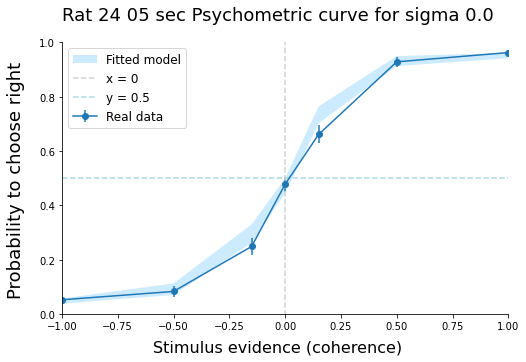

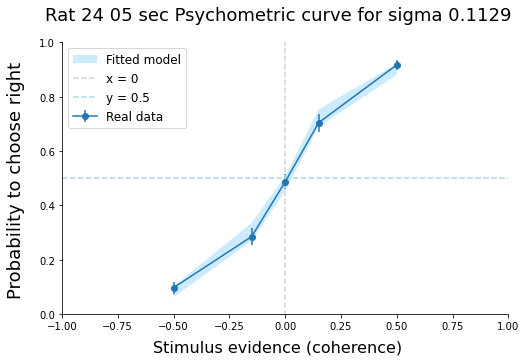

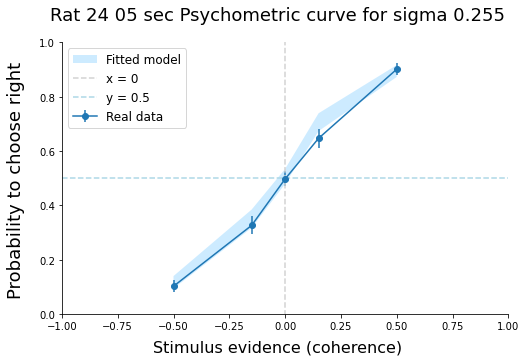

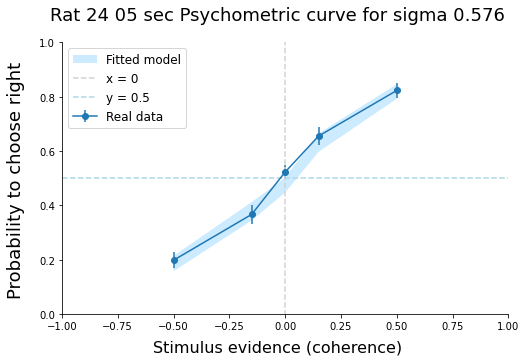

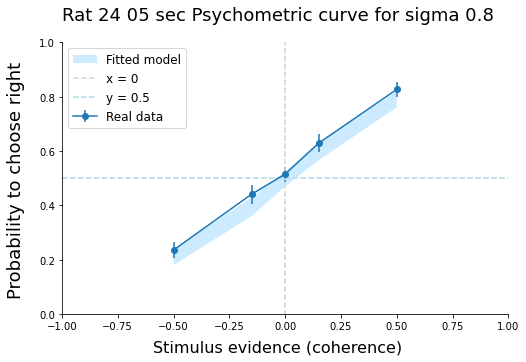

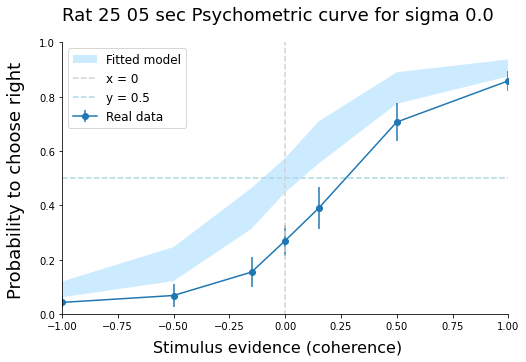

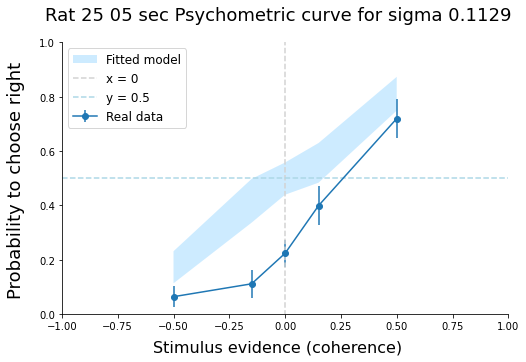

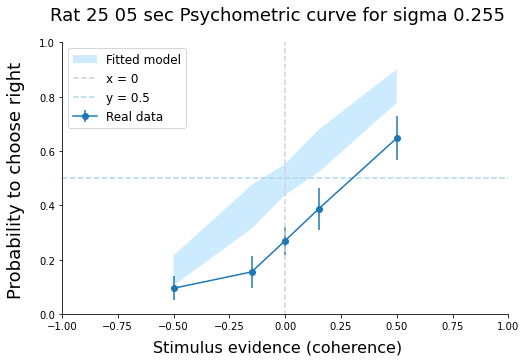

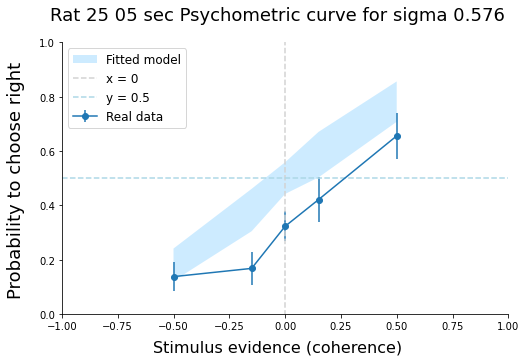

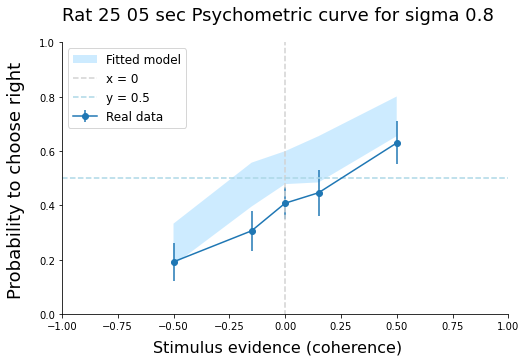

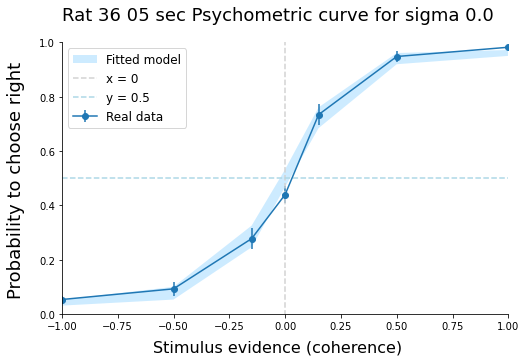

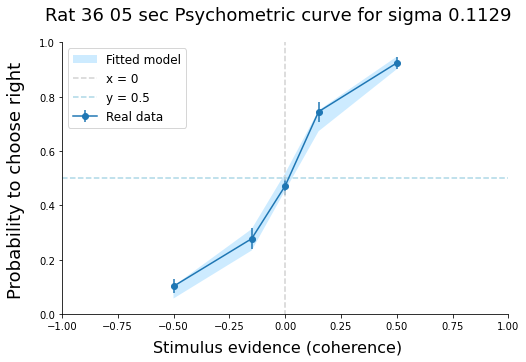

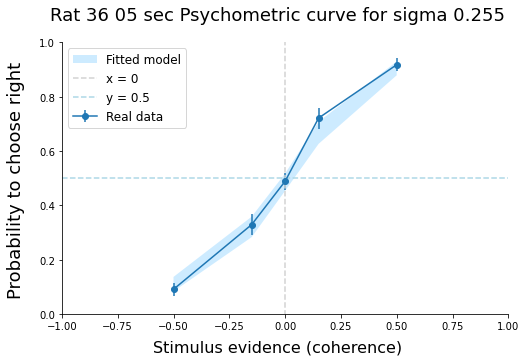

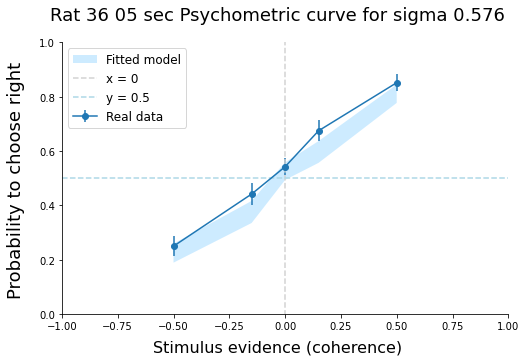

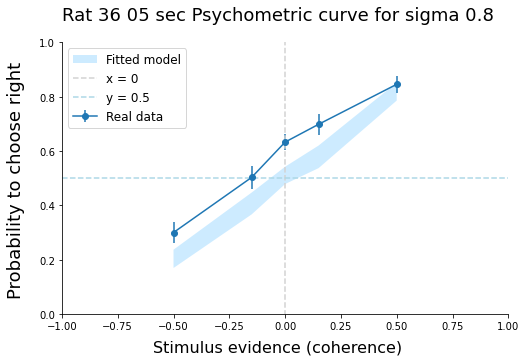

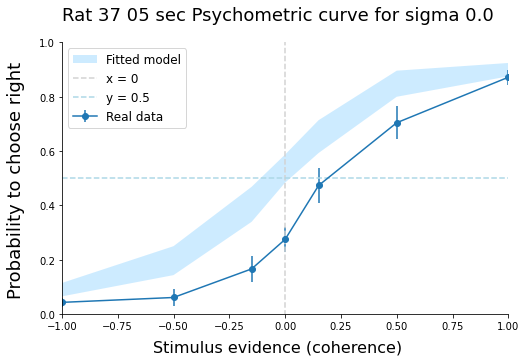

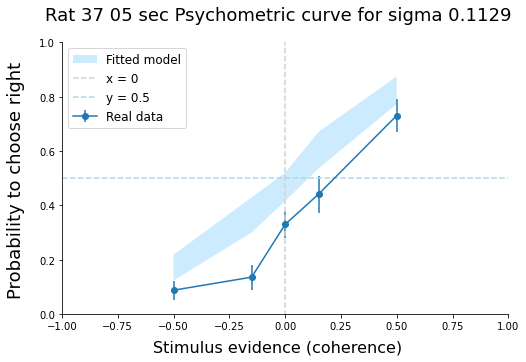

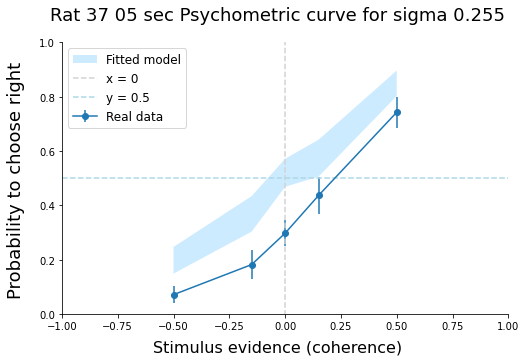

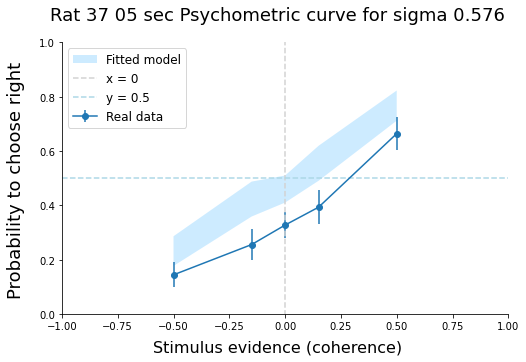

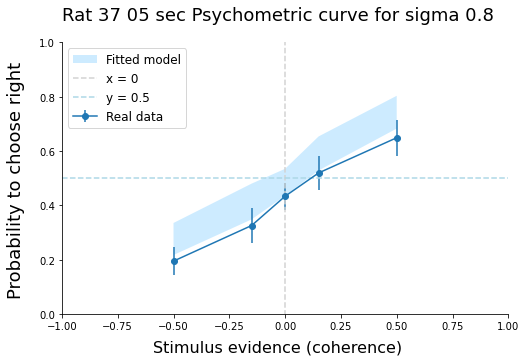

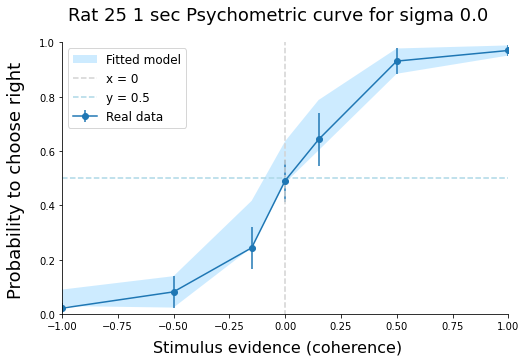

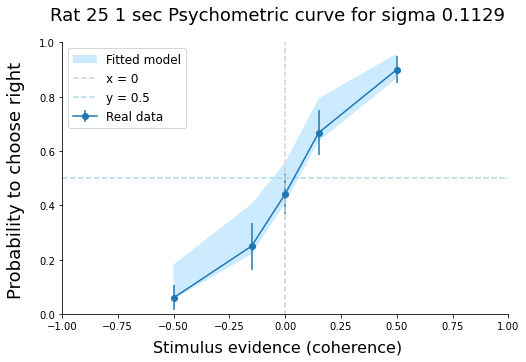

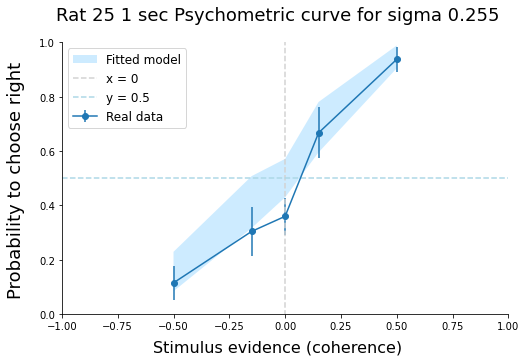

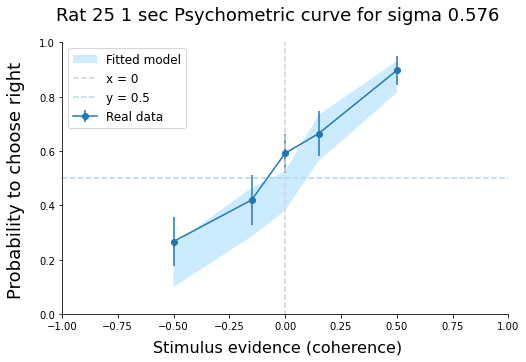

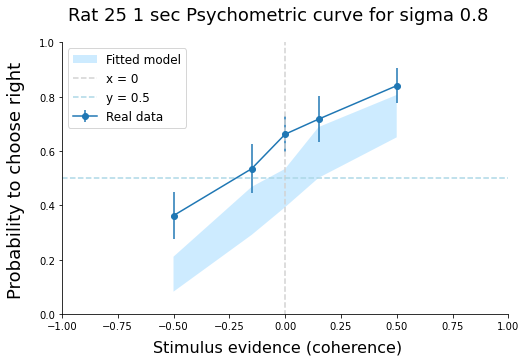

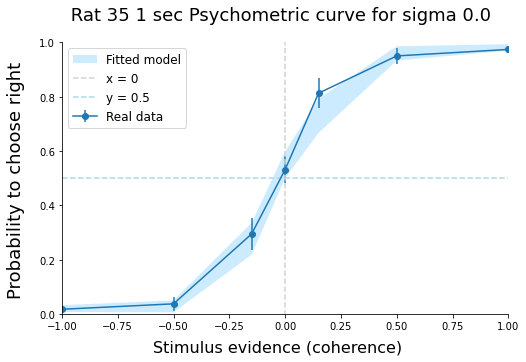

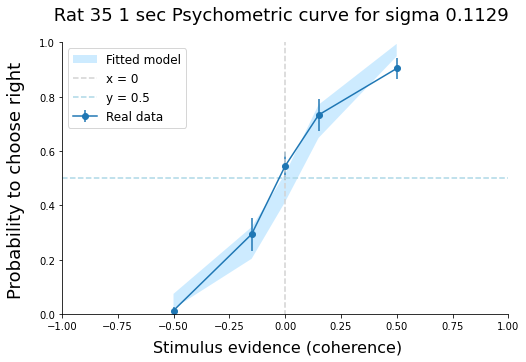

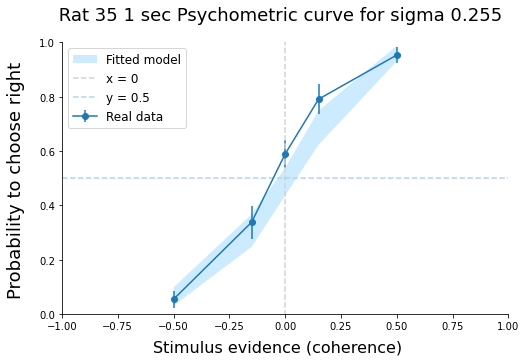

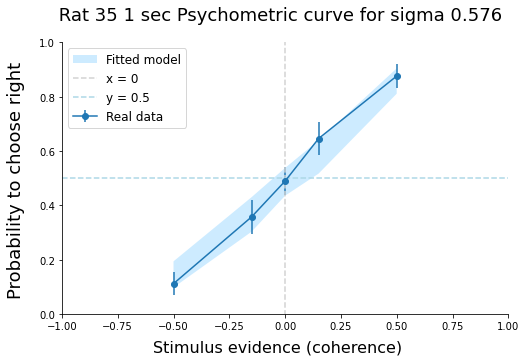

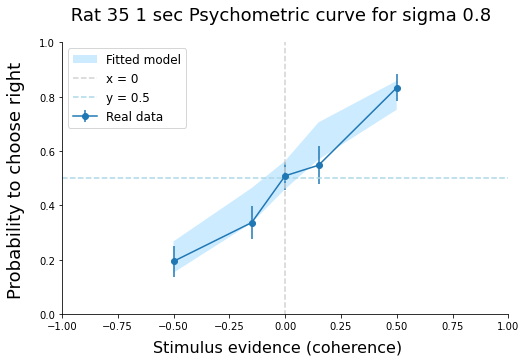

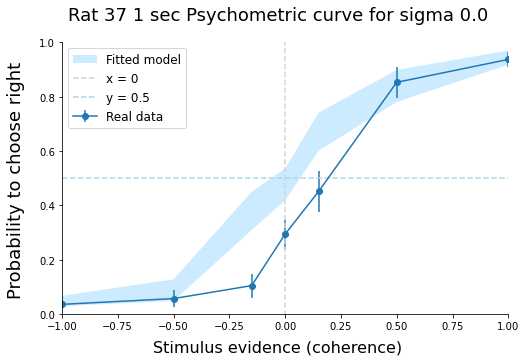

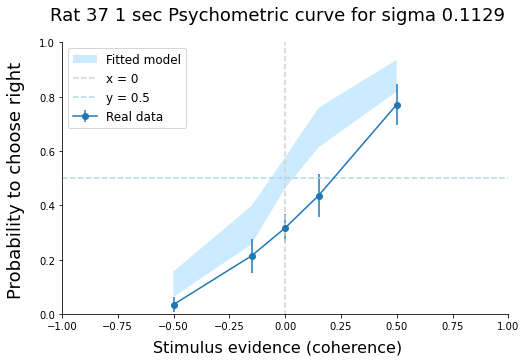

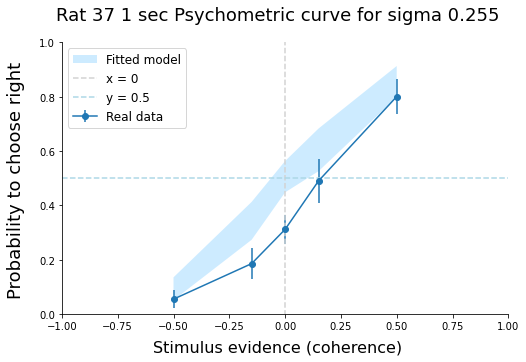

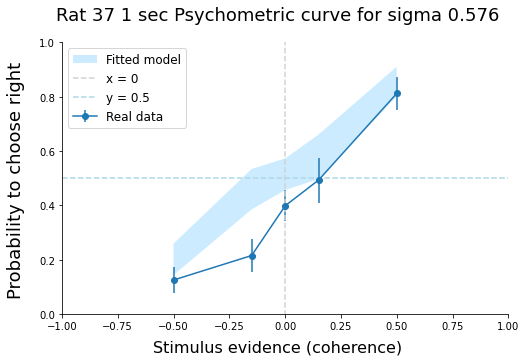

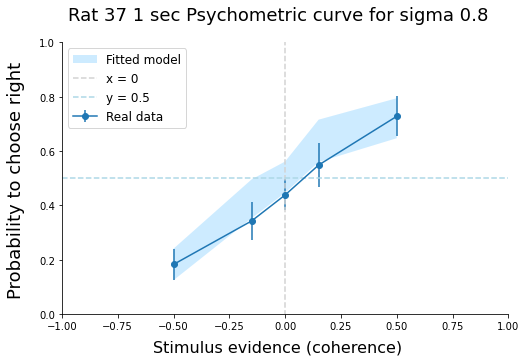

In [87]:
# For each rat, plot the psychometric curve with the coherence values which have above x trials
# fig, axs = plt.subplots(figsize = (8,5))
for rat in range(len(rats)):
    for a in range(len(coherences_lists[rat])):
            fig, axs = plt.subplots(figsize = (8,5))

            # Computing the confidence intervals (95%)
            z = 1.96
            conf_int = [[percentages_lists[rat][a][i]-z*(np.sqrt((percentages_lists[rat][a][i]*(1-percentages_lists[rat][a][i]))/length_lists[rat][a][i])) for i in range(len(percentages_lists[rat][a]))],
                        [percentages_lists[rat][a][i]+z*(np.sqrt((percentages_lists[rat][a][i]*(1-percentages_lists[rat][a][i]))/length_lists[rat][a][i])) for i in range(len(percentages_lists[rat][a]))]]
            conf_int = [[percentages_lists[rat][a][i]-conf_int[0][i] for i in range(len(percentages_lists[rat][a]))],[conf_int[1][i]-percentages_lists[rat][a][i] for i in range(len(percentages_lists[rat][a]))]]
            axs.errorbar(coherences_lists[rat][a],percentages_lists[rat][a],conf_int,marker='o',label = "Real data")
            conf_int = [[percentages_lists_fit[rat][a][i]-z*(np.sqrt((percentages_lists_fit[rat][a][i]*(1-percentages_lists_fit[rat][a][i]))/length_lists_fit[rat][a][i])) for i in range(len(percentages_lists_fit[rat][a]))],
                [percentages_lists_fit[rat][a][i]+z*(np.sqrt((percentages_lists_fit[rat][a][i]*(1-percentages_lists_fit[rat][a][i]))/length_lists_fit[rat][a][i])) for i in range(len(percentages_lists_fit[rat][a]))]]
            axs.fill_between(coherences_lists_fit[rat][a],conf_int[0],conf_int[1],alpha=0.2,facecolor='#089FFF', linewidth=4, linestyle='dashdot', antialiased=True,label = "Fitted model")

#             axs.plot(coherences_lists[rat][i],percentages_lists[rat][i],label="real psychometric curve",marker = "o")
            axs.axis([-1,1,0,1])
            axs.vlines(0,-1,1,color = "lightgrey",linestyles = "--",label ="x = 0")
            axs.hlines(0.5,-1,1,color = "lightblue",linestyles = "--",label = "y = 0.5")
            fig.suptitle(rats[rat]+" Psychometric curve for sigma "+str(sigma_lists[rat][a]),fontsize = 18)
            fig.text(0.5, 0.02, "Stimulus evidence (coherence)", ha='center',fontsize = 16)
            fig.text(0.03, 0.5, "Probability to choose right", va='center', rotation='vertical',fontsize = 18)
            axs.legend(loc = "upper left",fontsize = 12)
            axs.spines['right'].set_visible(False)
            axs.spines['top'].set_visible(False)
            
    
    

# fig.savefig(directory_images+'psychometric_curves/psychometric_curves_target_coherences.png', bbox_inches = 'tight')

### Comparing coherence distribution for each sigma

In [88]:
# Computing the coherence vector for all rats together
coherences_all_rats = []
for rat in range(len(rats)):
    coherences_all_rats.append(coherence_vectors[rat])
coherences_all_rats = rf.return_vector(coherences_all_rats)

# Computing the sigma vector for all rats tohether

sigmas_all_rats = rf.return_vector(sigma_lists)

In [89]:
# # Generates a file with a table of the number of trials for each coherence and sigma for all rats
# rf.recount_trials_all_rats(sigma_lists,coherences_all_rats,length_all_rats,"all rats",coherence_vectors,rats,sigmas_all_rats,directory_images)
# # Will make the chart with the recount of trials for each coherence and each sigma for each rat
# for rat in range(len(rats)):
#     rf.recount_trials(sigma_lists[rat],coherence_vectors[rat],length_lists[rat],rats[rat],coherences_lists[rat],directory_images)

/home/emma/github/TFG/functions/rat_functions1.py:374: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(figsize = (8,5))


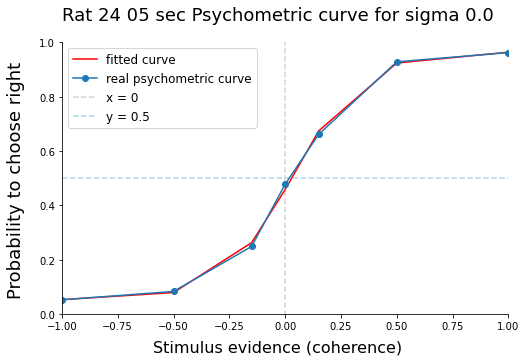

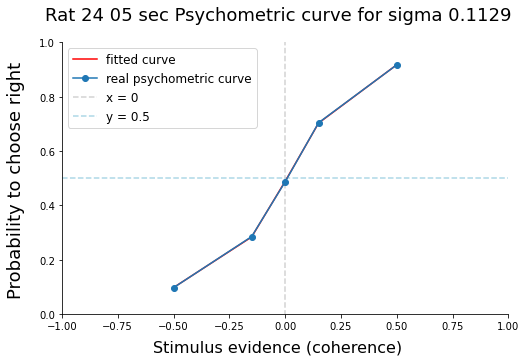

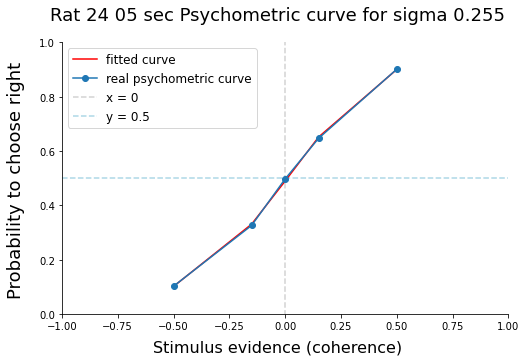

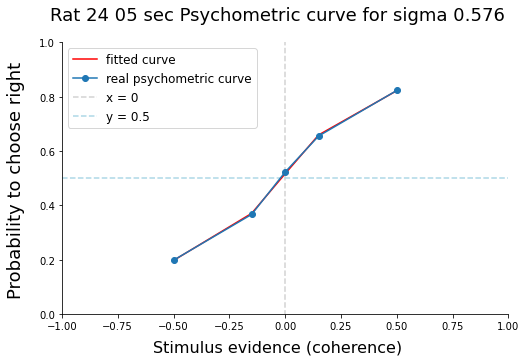

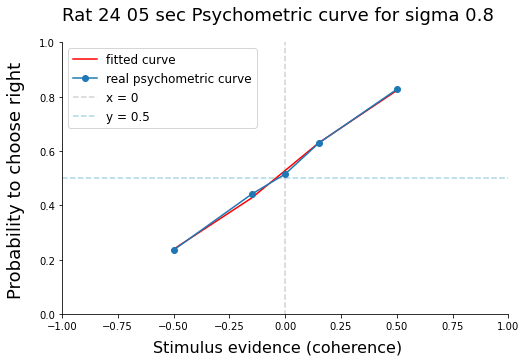

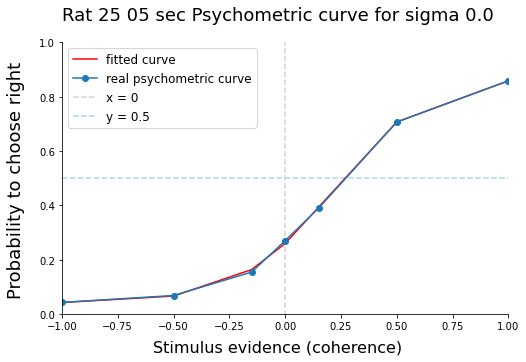

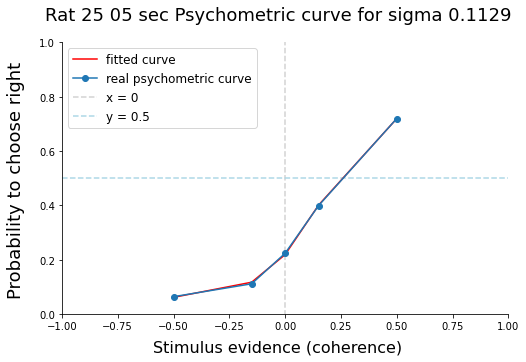

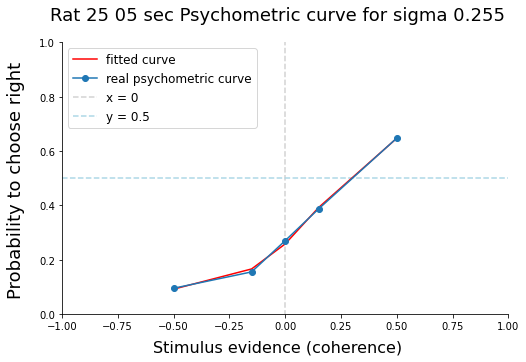

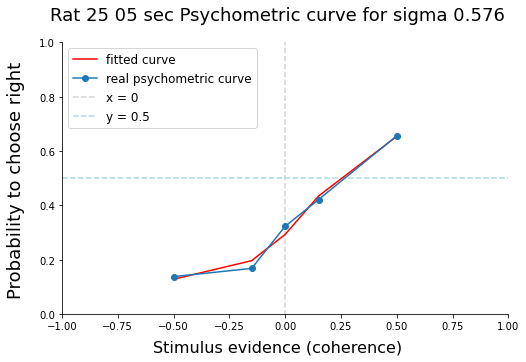

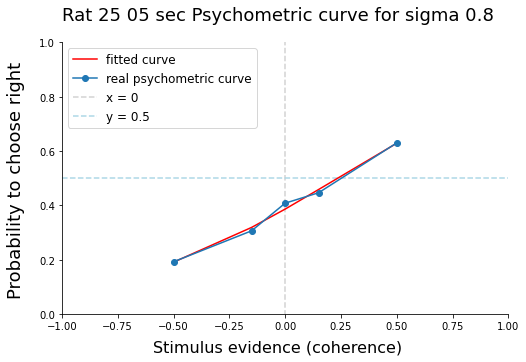

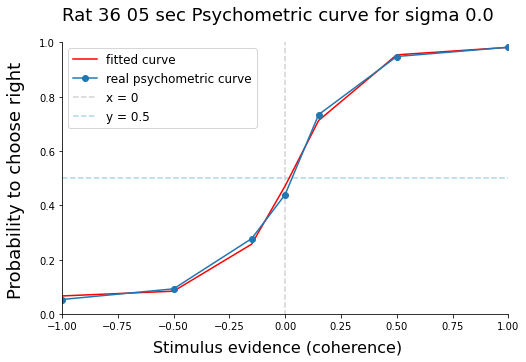

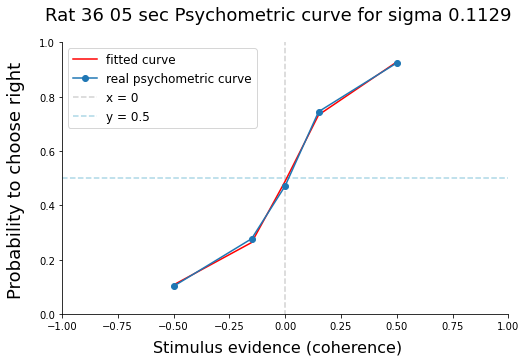

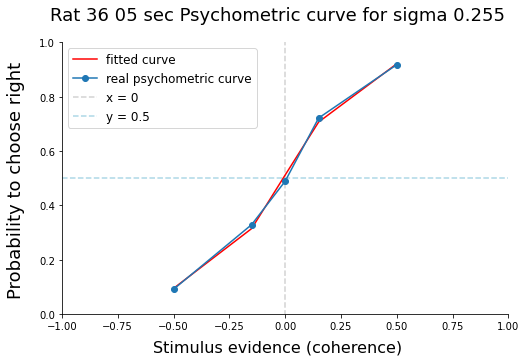

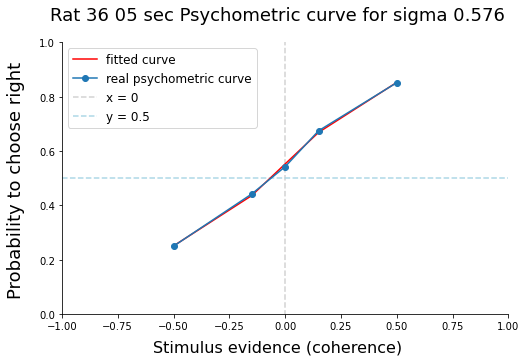

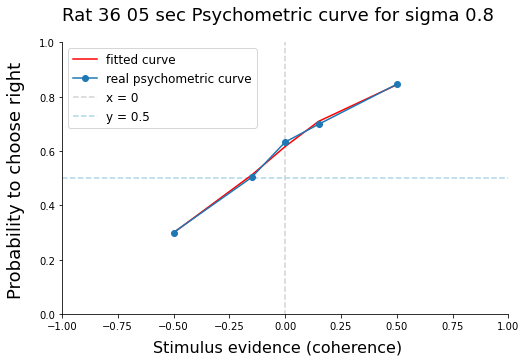

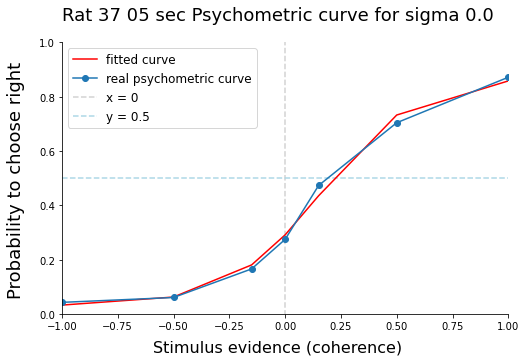

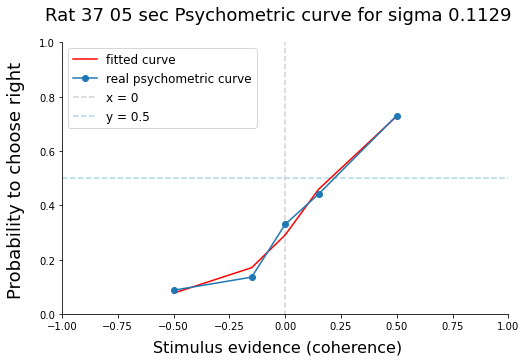

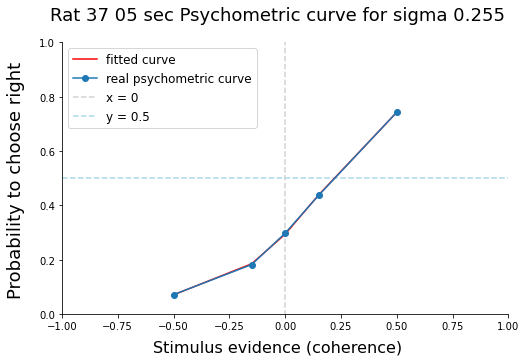

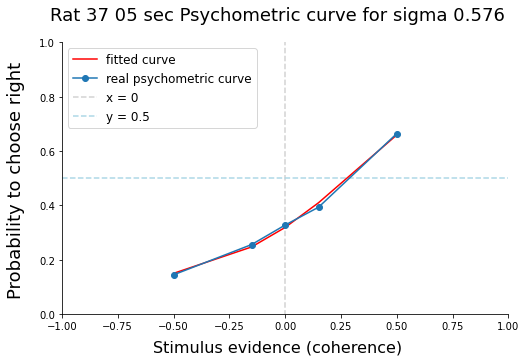

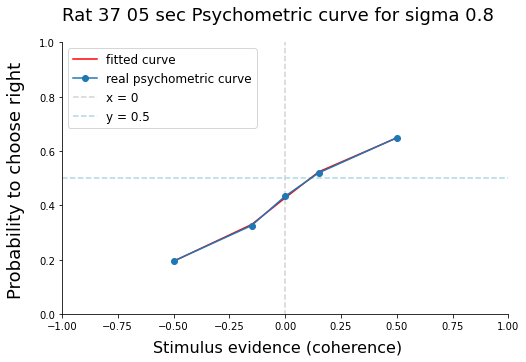

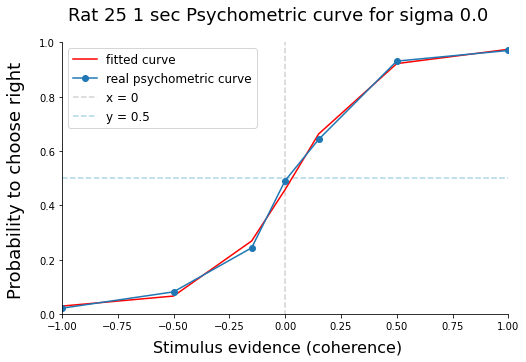

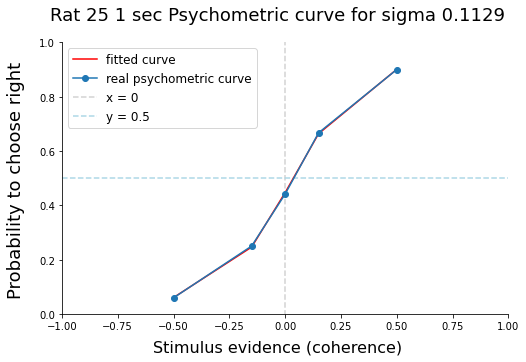

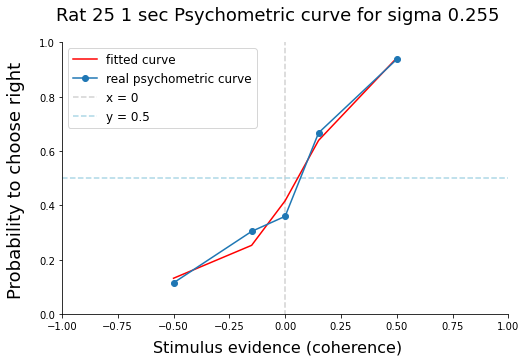

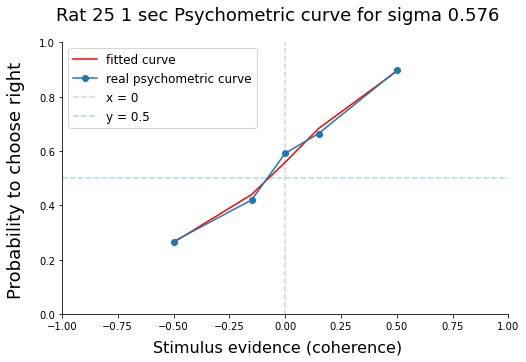

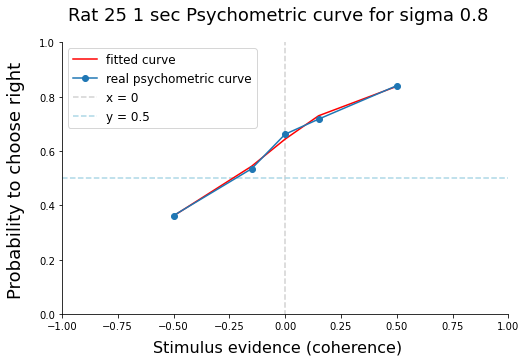

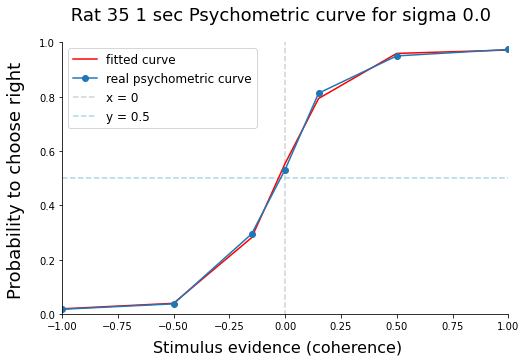

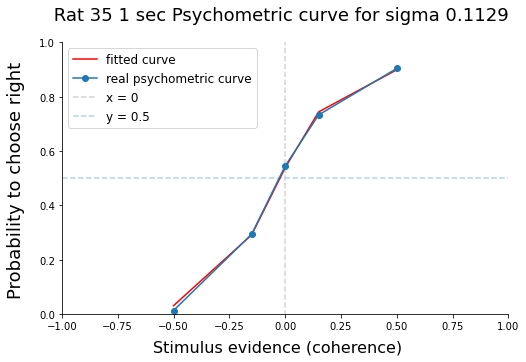

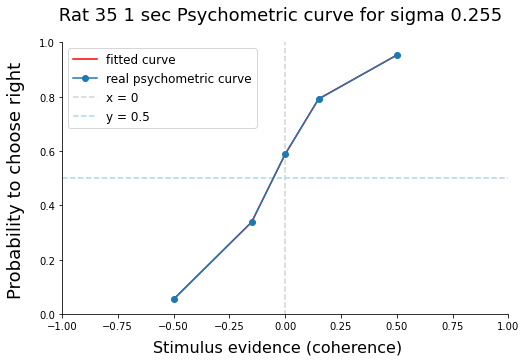

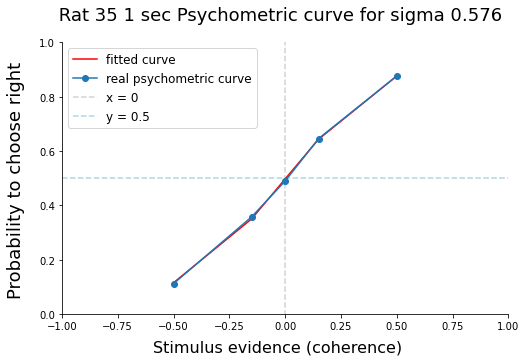

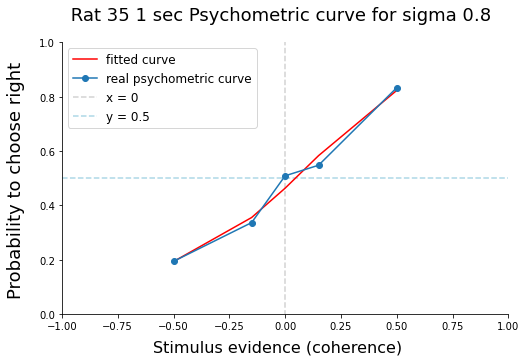

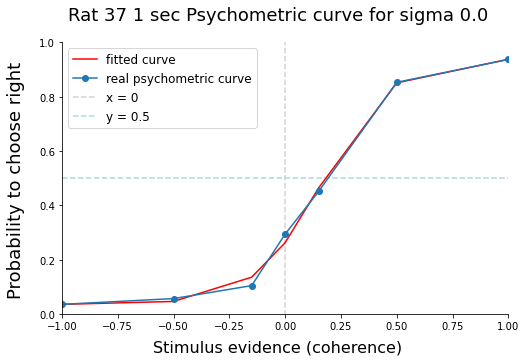

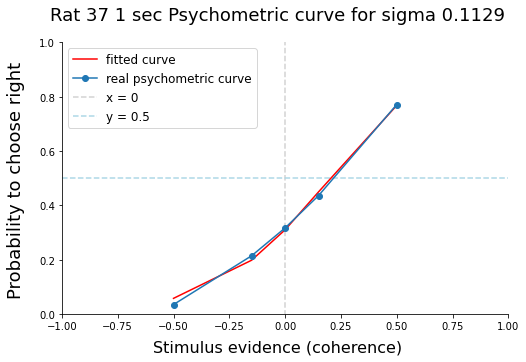

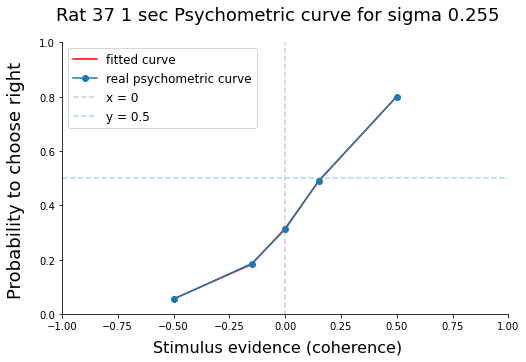

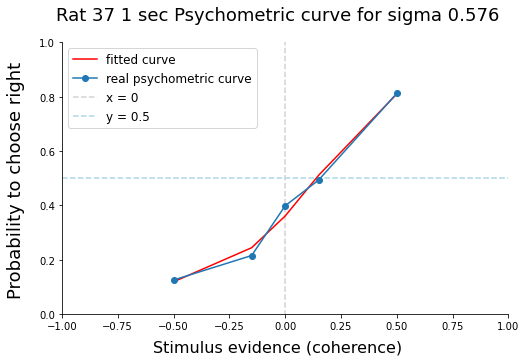

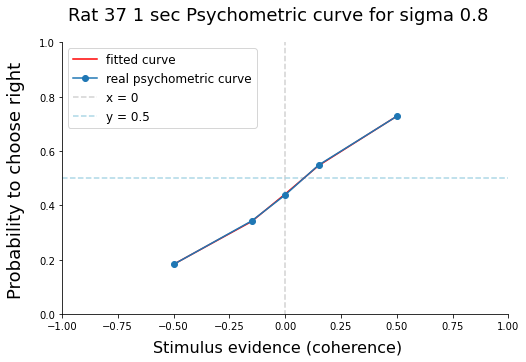

In [90]:
# Compute sensitivity and bias using curve_fit
all_sensitivity, all_bias = rf.compute_sensitivity(rats,coherences_lists,percentages_lists,sigma_lists,directory_images)

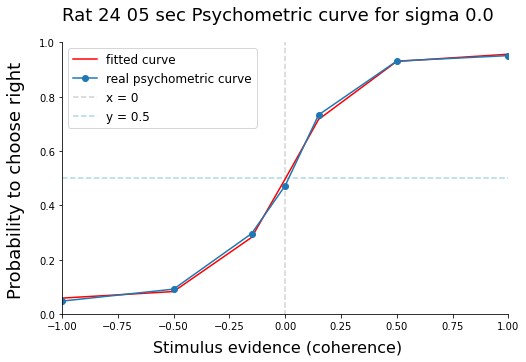

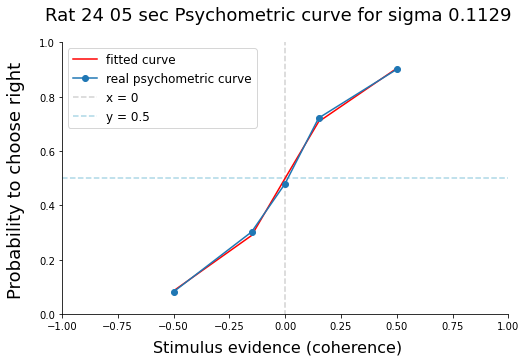

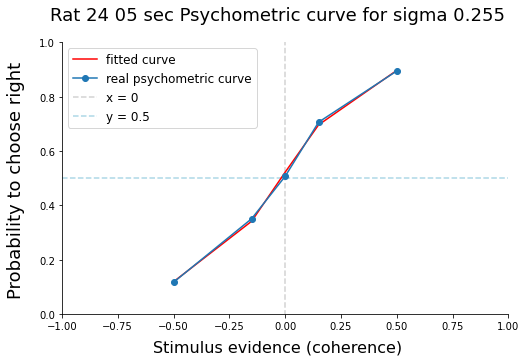

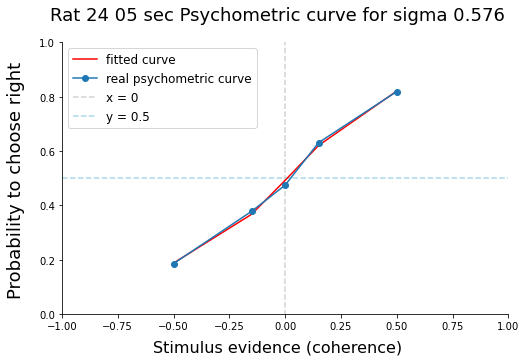

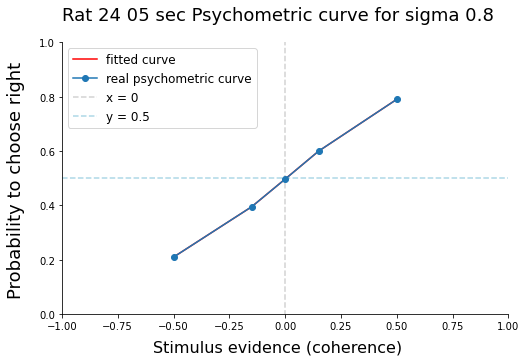

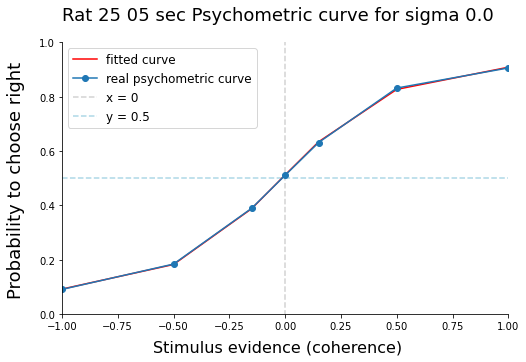

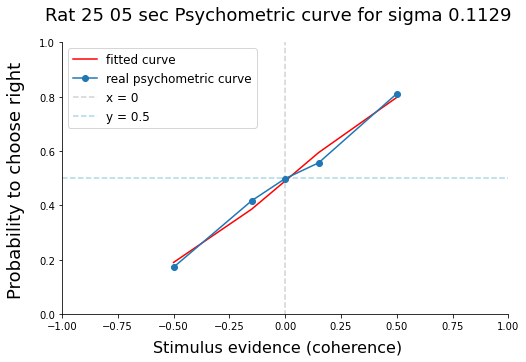

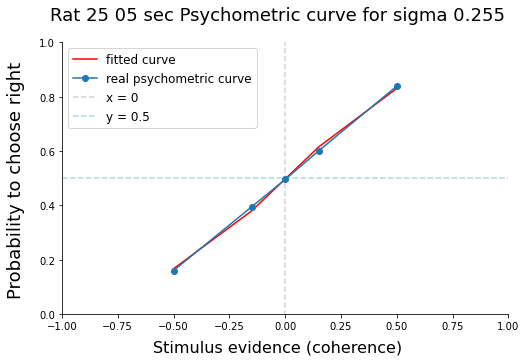

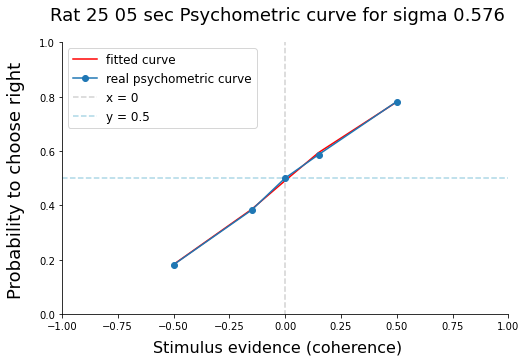

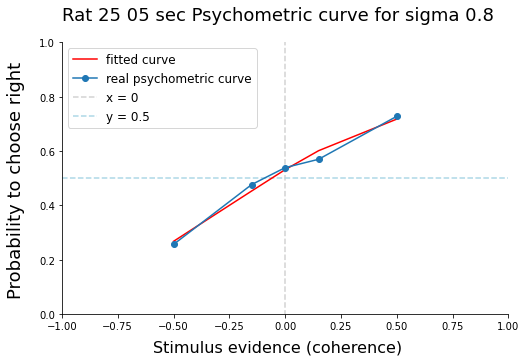

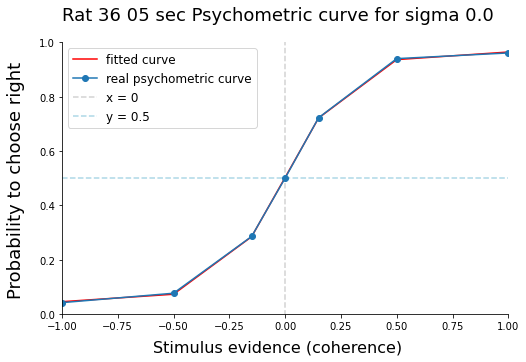

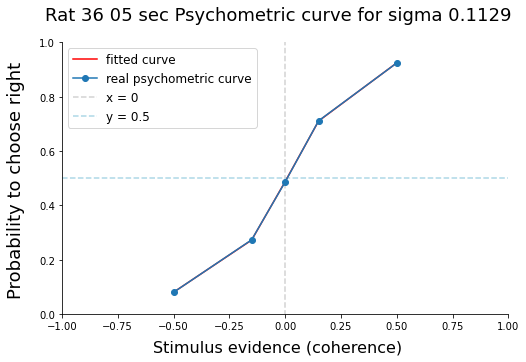

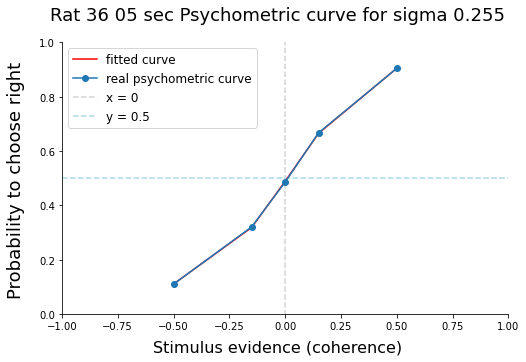

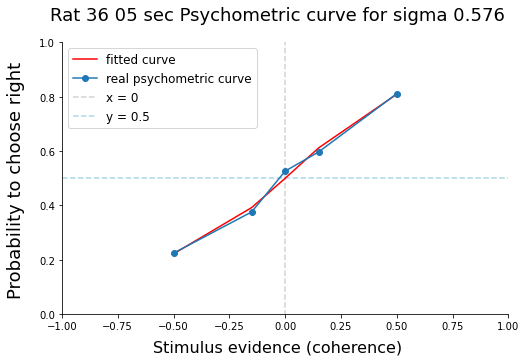

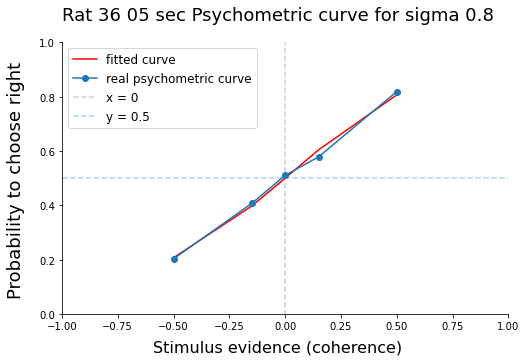

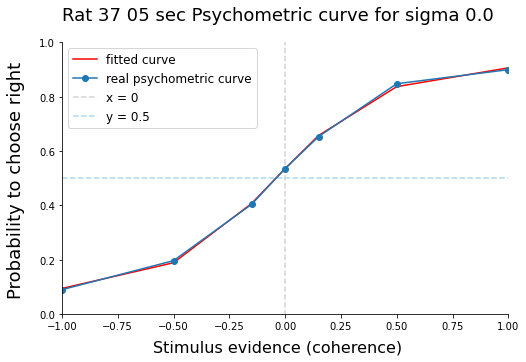

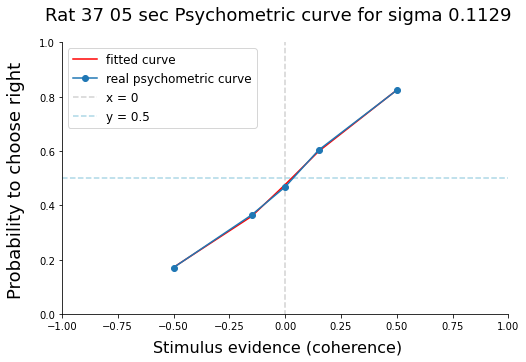

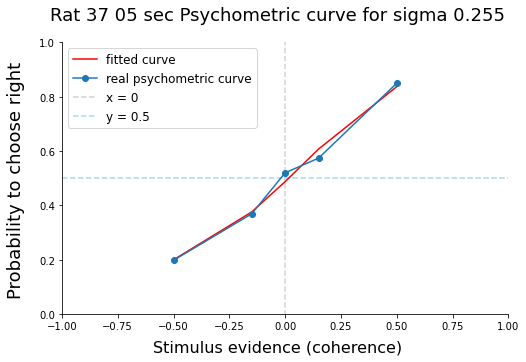

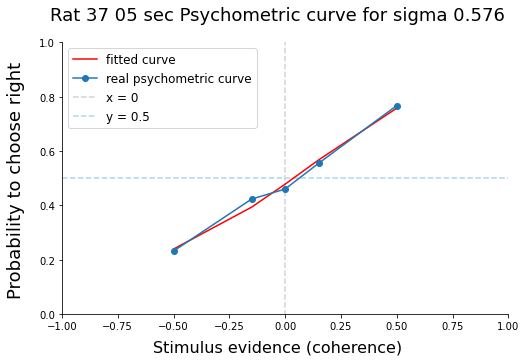

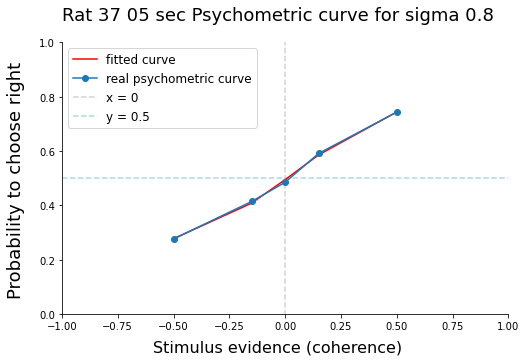

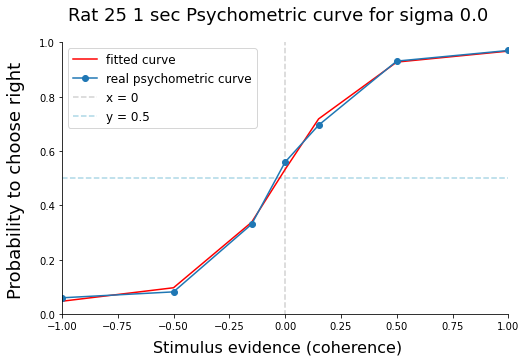

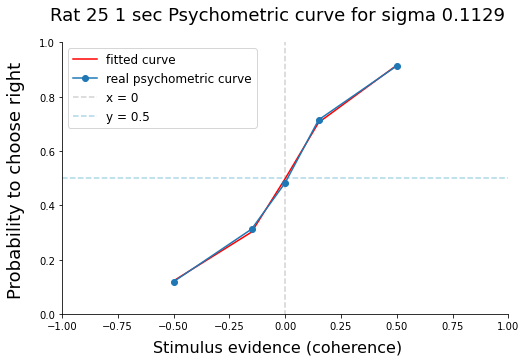

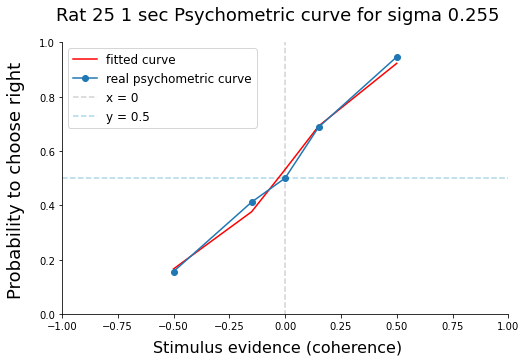

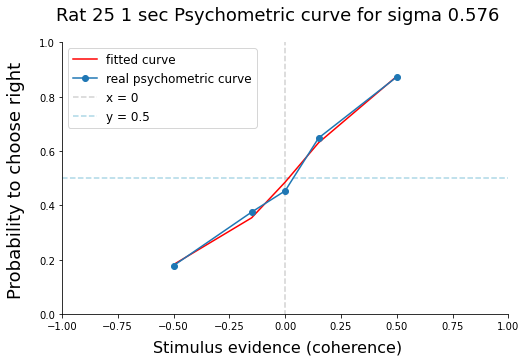

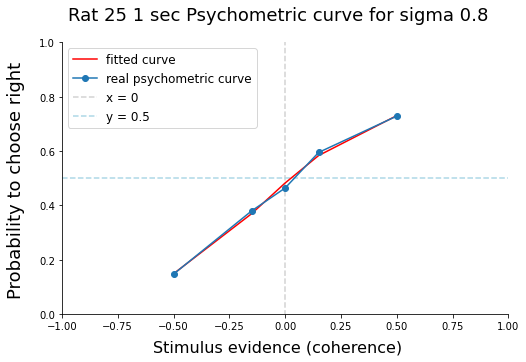

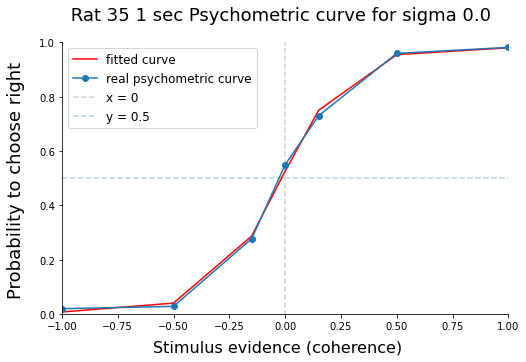

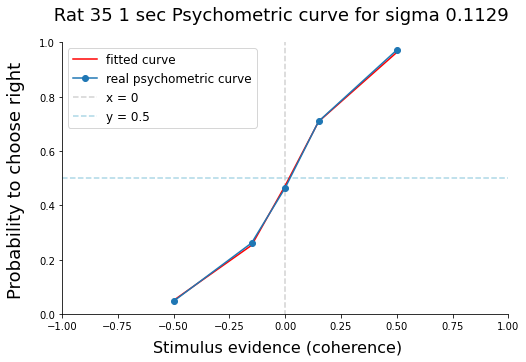

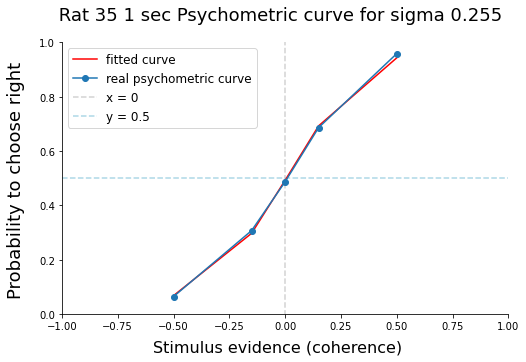

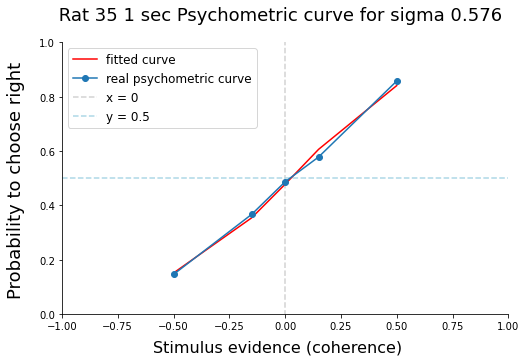

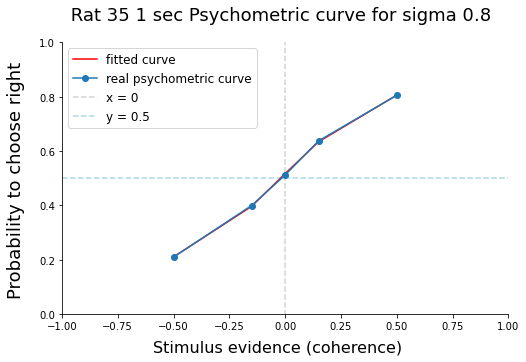

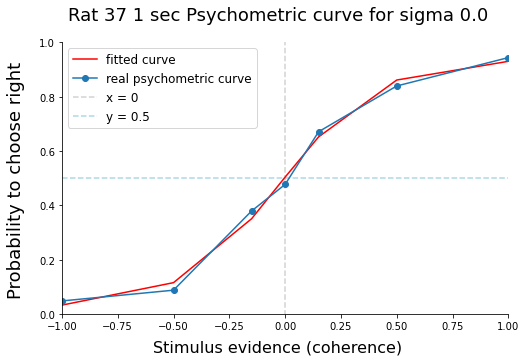

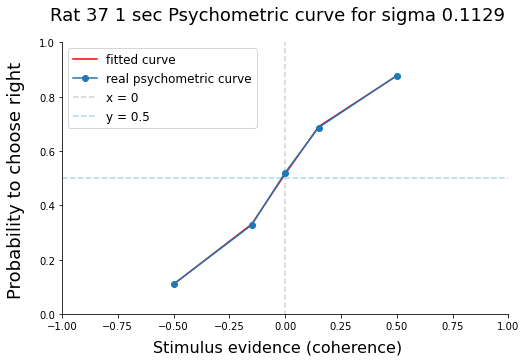

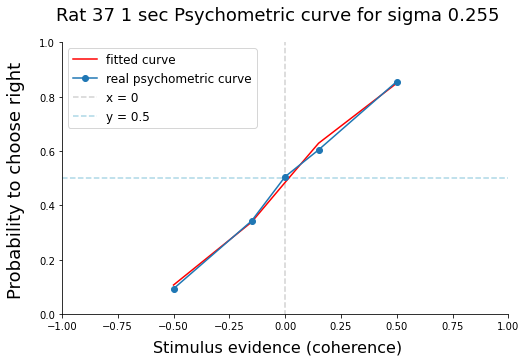

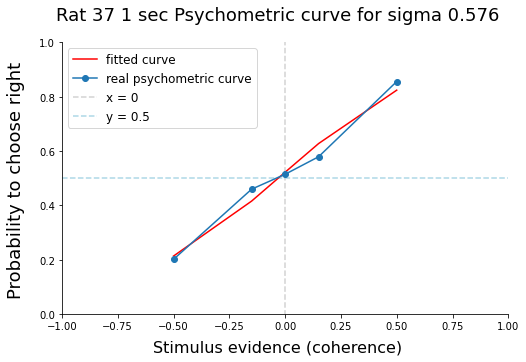

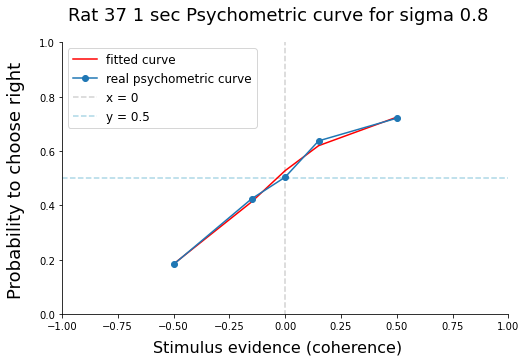

In [91]:
# Compute sensitivity and bias using curve_fit
all_sensitivity_fit, all_bias_fit = rf.compute_sensitivity(rats,coherences_lists_fit,percentages_lists_fit,sigma_lists_fit,directory_images)

In [92]:
# Performing bootstrap to compute confidence intervals
n_trials = 10

all_percentages_lists_boot = []
all_coherences_lists_boot = [] 
all_length_lists_boot = [] 
all_length_all_rats_boot  = []
for i in range(n_trials):
    new_divided_sigma = rf.bootstrap(results_divided_sigma)
    percentages_lists_boot, coherences_lists_boot, length_lists_boot, length_all_rats_boot = rf.compute_percentages(rats,new_divided_sigma,coherence_vectors)
    all_percentages_lists_boot.append(percentages_lists_boot)
    all_coherences_lists_boot.append(coherences_lists_boot)
    all_length_lists_boot.append(length_lists_boot)
    all_length_all_rats_boot.append(length_all_rats_boot)

In [93]:
# Performing bootstrap to compute confidence intervals
n_trials = 10

all_percentages_lists_boot_fit = []
all_coherences_lists_boot_fit = [] 
all_length_lists_boot_fit = [] 
all_length_all_rats_boot_fit  = []
for i in range(n_trials):
    new_divided_sigma = rf.bootstrap(results_divided_sigma_fit)
    percentages_lists_boot, coherences_lists_boot, length_lists_boot, length_all_rats_boot = rf.compute_percentages(rats,new_divided_sigma,coherence_vectors)
    all_percentages_lists_boot_fit.append(percentages_lists_boot)
    all_coherences_lists_boot_fit.append(coherences_lists_boot)
    all_length_lists_boot_fit.append(length_lists_boot)
    all_length_all_rats_boot_fit.append(length_all_rats_boot)

In [94]:
# Compute sensitivity and bias using curve_fit for the bootstrap data
all_sensitivity_boot = []
all_bias_boot = []
for i in range(len(all_percentages_lists_boot)):
    sensitivity_boot, bias_boot = rf.compute_sensitivity_boot(rats,all_coherences_lists_boot[i],all_percentages_lists_boot[i],sigma_lists)
    all_sensitivity_boot.append(sensitivity_boot)
    all_bias_boot.append(bias_boot)

In [95]:
# Compute sensitivity and bias using curve_fit for the bootstrap data
all_sensitivity_boot_fit = []
all_bias_boot_fit = []
for i in range(len(all_percentages_lists_boot_fit)):
    sensitivity_boot, bias_boot = rf.compute_sensitivity_boot(rats,all_coherences_lists_boot_fit[i],all_percentages_lists_boot_fit[i],sigma_lists)
    all_sensitivity_boot_fit.append(sensitivity_boot)
    all_bias_boot_fit.append(bias_boot)

In [96]:
# Computing the confidence intervals for the sensitivity
sensitivity_sigma = [np.zeros((len(sigma_lists[0]),n_trials)),np.zeros((len(sigma_lists[1]),n_trials)),np.zeros((len(sigma_lists[2]),n_trials)),np.zeros((len(sigma_lists[3]),n_trials)),
                    np.zeros((len(sigma_lists[4]),n_trials)),np.zeros((len(sigma_lists[5]),n_trials)),np.zeros((len(sigma_lists[6]),n_trials))]

for trial in range(len(all_sensitivity_boot)):
    for rat in range(len(all_sensitivity_boot[trial])):
        for sigm in range(len(all_sensitivity_boot[trial][rat])):
             sensitivity_sigma[rat][sigm][trial] = all_sensitivity_boot[trial][rat][sigm]

conf_intervals_sensitivity = []
for rat in range(len(rats)):
    sensitivity_rat = []
    for a in range(len(all_sensitivity_boot[0][rat])):
        sens = sensitivity_sigma[rat][a]

        z = 1.96
        conf_int = [np.mean(sens)-z*np.std(sens),np.mean(sens)+z*np.std(sens)]
        sensitivity_rat.append(conf_int)

    conf_intervals_sensitivity.append(sensitivity_rat)

In [97]:
# Computing the confidence intervals for the sensitivity
sensitivity_sigma_fit = [np.zeros((len(sigma_lists[0]),n_trials)),np.zeros((len(sigma_lists[1]),n_trials)),np.zeros((len(sigma_lists[2]),n_trials)),np.zeros((len(sigma_lists[3]),n_trials)),
                    np.zeros((len(sigma_lists[4]),n_trials)),np.zeros((len(sigma_lists[5]),n_trials)),np.zeros((len(sigma_lists[6]),n_trials))]

for trial in range(len(all_sensitivity_boot_fit)):
    for rat in range(len(all_sensitivity_boot_fit[trial])):
        for sigm in range(len(all_sensitivity_boot_fit[trial][rat])):
             sensitivity_sigma_fit[rat][sigm][trial] = all_sensitivity_boot_fit[trial][rat][sigm]

conf_intervals_sensitivity_fit = []
for rat in range(len(rats)):
    sensitivity_rat = []
    for a in range(len(all_sensitivity_boot_fit[0][rat])):
        sens = sensitivity_sigma_fit[rat][a]

        z = 1.96
        conf_int = [np.mean(sens)-z*np.std(sens),np.mean(sens)+z*np.std(sens)]
        sensitivity_rat.append(conf_int)

    conf_intervals_sensitivity_fit.append(sensitivity_rat)

In [98]:
# Computing the bias confidence intervals
bias_sigma = [np.zeros((len(sigma_lists[0]),n_trials)),np.zeros((len(sigma_lists[1]),n_trials)),np.zeros((len(sigma_lists[2]),n_trials)),np.zeros((len(sigma_lists[3]),n_trials)),
                    np.zeros((len(sigma_lists[4]),n_trials)),np.zeros((len(sigma_lists[5]),n_trials)),np.zeros((len(sigma_lists[6]),n_trials))]

for trial in range(len(all_bias_boot)):
    for rat in range(len(all_bias_boot[trial])):
        for sigm in range(len(all_bias_boot[trial][rat])):
             bias_sigma[rat][sigm][trial] = all_bias_boot[trial][rat][sigm]

conf_intervals_bias = []
for rat in range(len(rats)):
    bias_rat = []
    for a in range(len(all_bias_boot[0][rat])):
        bias = bias_sigma[rat][a]

        z = 1.96
        conf_int = [np.mean(bias)-z*np.std(bias),np.mean(bias)+z*np.std(bias)]
        bias_rat.append(conf_int)

    conf_intervals_bias.append(bias_rat)


In [99]:
# Computing the bias confidence intervals
bias_sigma_fit = [np.zeros((len(sigma_lists[0]),n_trials)),np.zeros((len(sigma_lists[1]),n_trials)),np.zeros((len(sigma_lists[2]),n_trials)),np.zeros((len(sigma_lists[3]),n_trials)),
                    np.zeros((len(sigma_lists[4]),n_trials)),np.zeros((len(sigma_lists[5]),n_trials)),np.zeros((len(sigma_lists[6]),n_trials))]

for trial in range(len(all_bias_boot_fit)):
    for rat in range(len(all_bias_boot_fit[trial])):
        for sigm in range(len(all_bias_boot_fit[trial][rat])):
             bias_sigma_fit[rat][sigm][trial] = all_bias_boot_fit[trial][rat][sigm]

conf_intervals_bias_fit = []
for rat in range(len(rats)):
    bias_rat = []
    for a in range(len(all_bias_boot_fit[0][rat])):
        bias = bias_sigma[rat][a]

        z = 1.96
        conf_int = [np.mean(bias)-z*np.std(bias),np.mean(bias)+z*np.std(bias)]
        bias_rat.append(conf_int)

    conf_intervals_bias_fit.append(bias_rat)


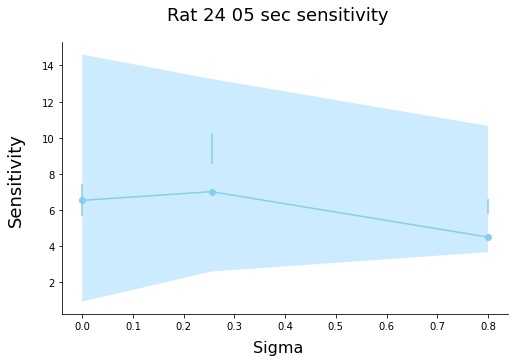

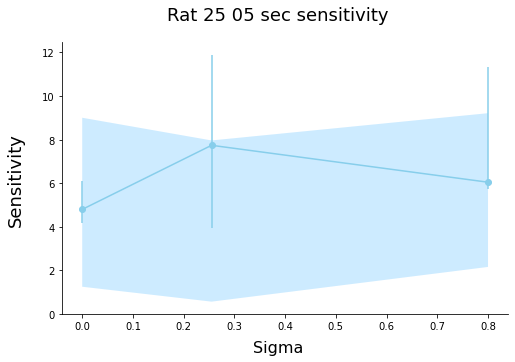

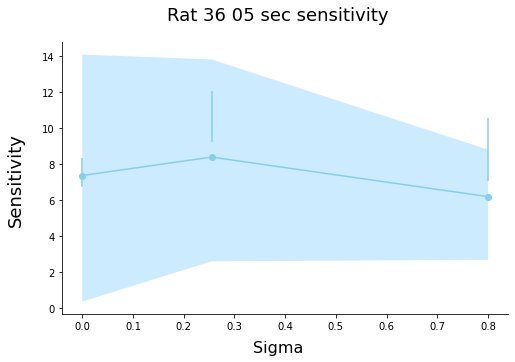

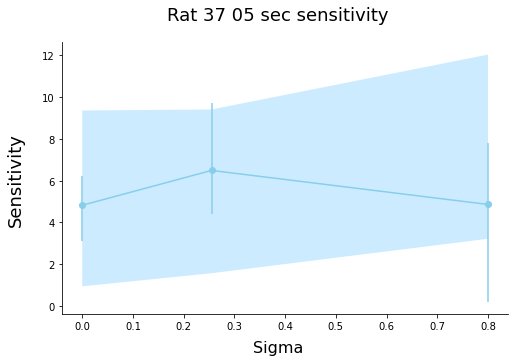

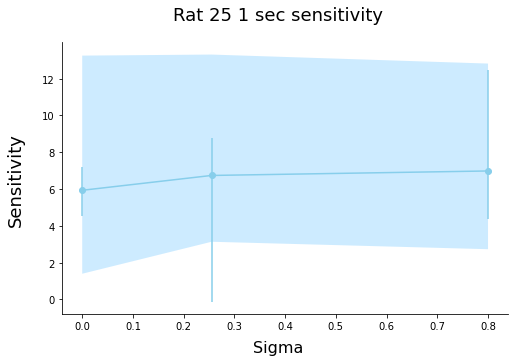

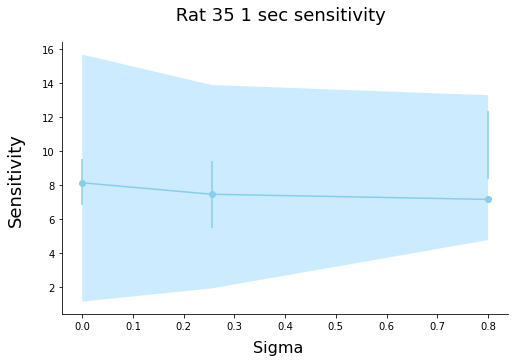

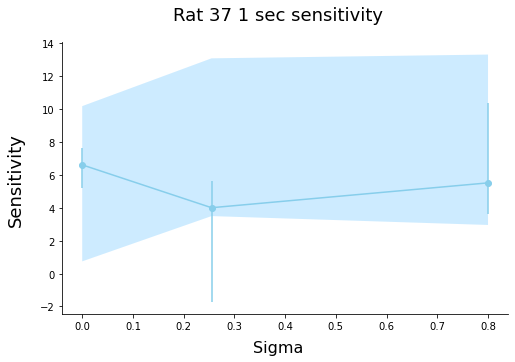

In [100]:
# Plot of the sensitivity over sigma
for rat in range(len(rats)):
    fig, axs = plt.subplots(figsize = (8,5))
    conf_int = [[conf_intervals_sensitivity[rat][i][0] for i in range(len(sigma_lists[rat]))],[conf_intervals_sensitivity[rat][i][1] for i in range(len(sigma_lists[rat]))]]
    conf_int_0 = []
    conf_int_1 = []
    new_sigma_list = []
    new_sensitivity = []
    for i in range(len(conf_int[0])):
        if str(conf_int[0][i]) != "nan":
            if all_sensitivity[rat][i] != None:

                conf_int_0.append(conf_int[0][i]-all_sensitivity[rat][i])
                conf_int_1.append(all_sensitivity[rat][i]-conf_int[1][i])
                new_sigma_list.append(sigma_lists[rat][i])
                new_sensitivity.append(all_sensitivity[rat][i])
    conf_int = [conf_int_0,conf_int_1]
    plt.errorbar(new_sigma_list,new_sensitivity,conf_int,marker='o',color= "skyblue")
    conf_int = [[conf_intervals_sensitivity_fit[rat][i][0] for i in range(len(sigma_lists[rat]))],[conf_intervals_sensitivity_fit[rat][i][1] for i in range(len(sigma_lists[rat]))]]
    conf_int_0 = []
    conf_int_1 = []
    new_sigma_list = []
    new_sensitivity = []
    for i in range(len(conf_int[0])):
        if str(conf_int[0][i]) != "nan":
            if all_sensitivity_fit[rat][i] != None:

                conf_int_0.append(all_sensitivity_fit[rat][i]-conf_int[0][i])
                conf_int_1.append(all_sensitivity_fit[rat][i]+conf_int[1][i])
                new_sigma_list.append(sigma_lists[rat][i])
                new_sensitivity.append(all_sensitivity_fit[rat][i])
    conf_int = [conf_int_0,conf_int_1]
    plt.fill_between(new_sigma_list,conf_int_0,conf_int_1,alpha=0.2,facecolor='#089FFF',
    linewidth=4, linestyle='dashdot', antialiased=True)
#     plt.axis([-0.1,0.9,-1,50])
    
    
    hp.remove_axis(axs)
    fig.suptitle(rats[rat]+" sensitivity",fontsize = 18)
    fig.text(0.5, 0.02, "Sigma", ha='center',fontsize = 16)
    fig.text(0.03, 0.5, "Sensitivity", va='center', rotation='vertical',fontsize = 18)
#     fig.savefig(directory_images+'sensitivity/sensitivity_'+rats[rat]+'.png', bbox_inches = 'tight')

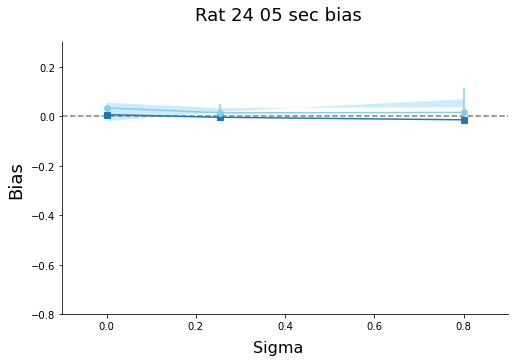

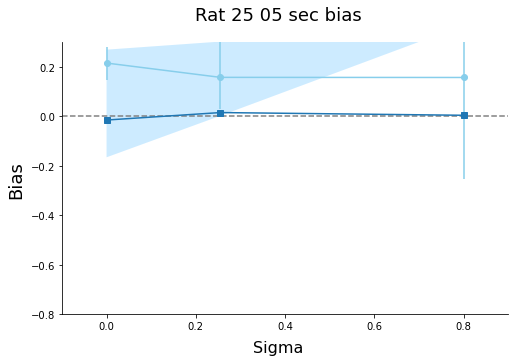

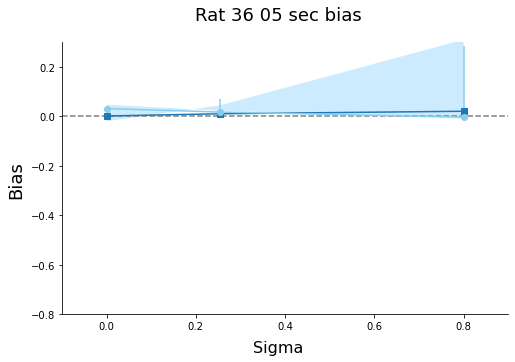

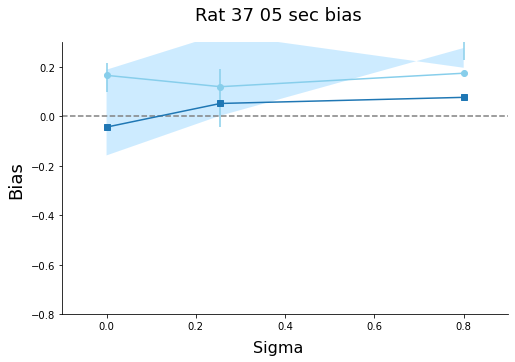

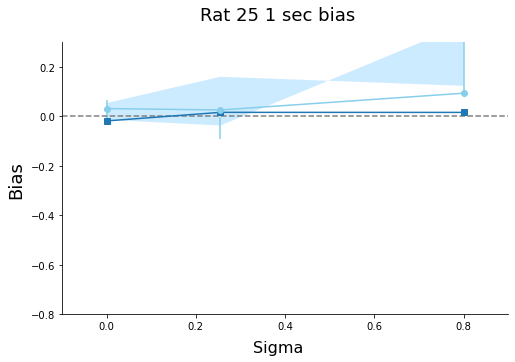

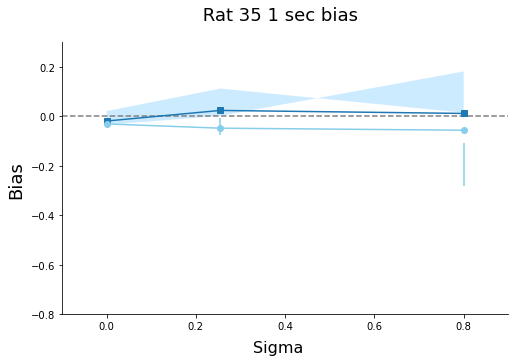

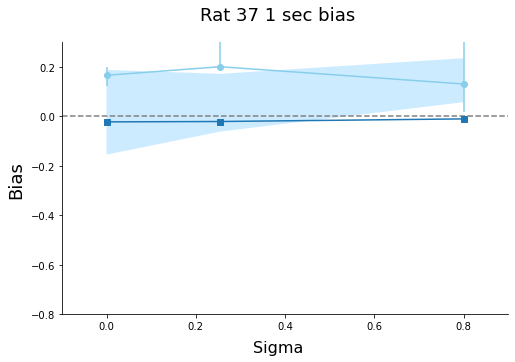

In [101]:
# Plot of the bias over sigma
for rat in range(len(rats)):
    fig, axs = plt.subplots(figsize = (8,5))
    conf_int = [[conf_intervals_bias[rat][i][0] for i in range(len(sigma_lists[rat]))],[conf_intervals_bias[rat][i][1] for i in range(len(sigma_lists[rat]))]]
    conf_int_0 = []
    conf_int_1 = []
    new_sigma_list = []
    new_bias = []
    for i in range(len(conf_int[0])):
        if str(conf_int[0][i]) != "nan":
            if all_bias[rat][i] != None:
                conf_int_0.append(conf_int[0][i]-all_bias[rat][i])
                conf_int_1.append(all_bias[rat][i]-conf_int[1][i])
                new_sigma_list.append(sigma_lists[rat][i])
                new_bias.append(all_bias[rat][i])
    conf_int = [conf_int_0,conf_int_1]
    plt.errorbar(new_sigma_list,new_bias,conf_int,marker='o',color="skyblue")
    
    
    conf_int = [[conf_intervals_bias_fit[rat][i][0] for i in range(len(sigma_lists[rat]))],[conf_intervals_bias_fit[rat][i][1] for i in range(len(sigma_lists[rat]))]]
    conf_int_0 = []
    conf_int_1 = []
    new_sigma_list = []
    new_bias = []
    for i in range(len(conf_int[0])):
        if str(conf_int[0][i]) != "nan":
            if all_bias_fit[rat][i] != None:
                conf_int_0.append(all_bias_fit[rat][i]-conf_int[0][i])
                conf_int_1.append(all_bias_fit[rat][i]+conf_int[1][i])
                new_sigma_list.append(sigma_lists[rat][i])
                new_bias.append(all_bias_fit[rat][i])
    plt.fill_between(new_sigma_list,conf_int_0,conf_int_1,alpha=0.2,facecolor='#089FFF',
    linewidth=4, linestyle='dashdot', antialiased=True)    
    
    
    plt.plot(new_sigma_list,new_bias,marker = 's')
    plt.hlines(0,-0.1,0.9,color = "grey",linestyles = "--")
    plt.axis([-0.1,0.9,-0.8,0.3])
    hp.remove_axis(axs)
    fig.suptitle(rats[rat]+" bias",fontsize = 18)
    fig.text(0.5, 0.02, "Sigma", ha='center',fontsize = 16)
    fig.text(0.03, 0.5, "Bias", va='center', rotation='vertical',fontsize = 18)
#     fig.savefig(directory_images+'bias/bias'+rats[rat]+'.png', bbox_inches = 'tight')

## Dividing the data by sigma (without taking coherence into account)

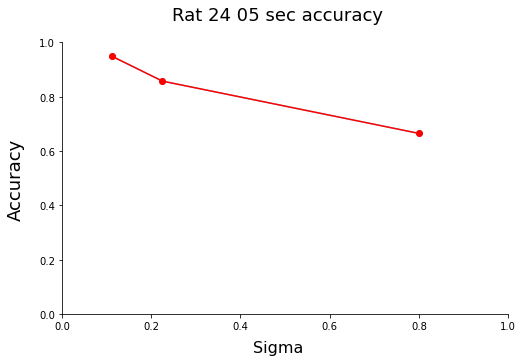

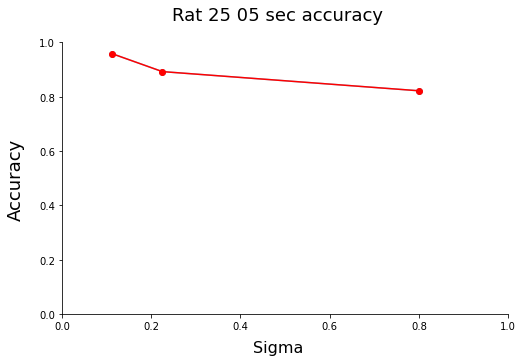

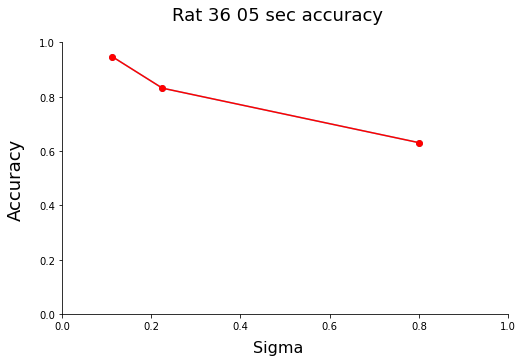

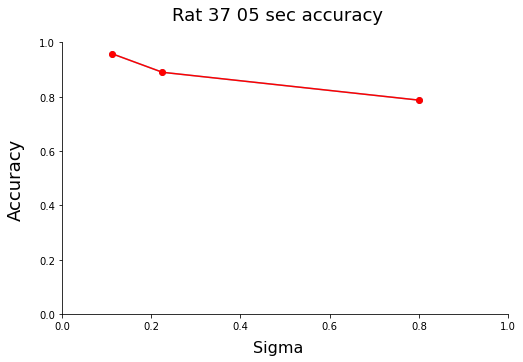

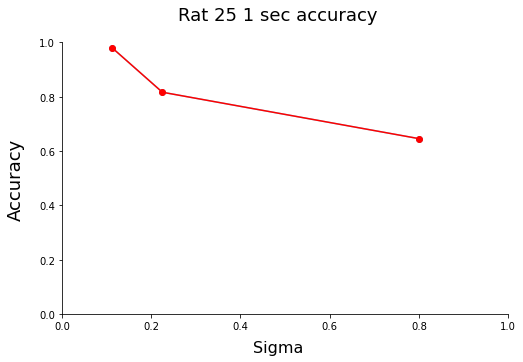

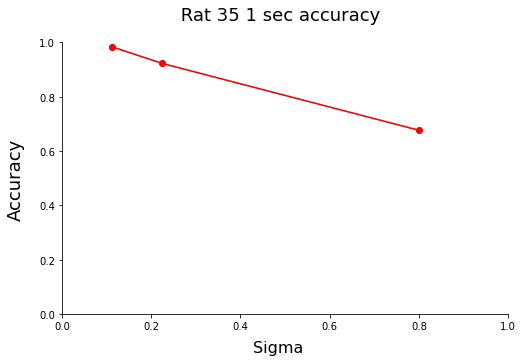

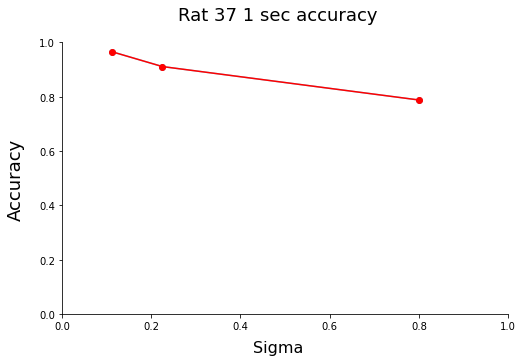

In [102]:
results_divided_sigma_nocoh_fit = [] # results_divided_sigma_nocoh[rat][sigma][reward,decision,performance,stim]
perc_sigma_nocoh_fit = []
# Dividing the data over sigma (not by coherence)
results_divided_sigma_nocoh = [] # results_divided_sigma_nocoh[rat][sigma][reward,decision,performance,stim]
perc_sigma_nocoh = []

sigmas_lists =[[0.1129,0.1129],[0.225,0.576],[0.8,0.8]] 


for rat in range(len(rats)):
    divided_sigma = []
    for sigma in sigmas_lists:
        divided_sigma.append(rf.divide_sigma_1(rewards[rat],choices[rat],performances[rat],stimulus[rat],target_sigmas[rat],sigma))
    perc = []
    number_trials = []
    results_divided_sigma_nocoh.append(divided_sigma)
    for i in range(len(divided_sigma)):
        perc.append(sum(results_divided_coherence[rat][i][2])/len(results_divided_coherence[rat][i][2]))
        number_trials.append(len(results_divided_coherence[rat][i][1]))
    perc_sigma_nocoh.append(perc)


    fig, axs = plt.subplots(figsize = (8,5))
    plt.plot([s[0] for s in sigmas_lists],perc,marker = 'o',color="skyblue")
    plt.axis([0,1,0,1])
    hp.remove_axis(axs)
    fig.suptitle(rats[rat]+" accuracy",fontsize = 18)
    fig.text(0.5, 0.02, "Sigma", ha='center',fontsize = 16)
    fig.text(0.03, 0.5, "Accuracy", va='center', rotation='vertical',fontsize = 18)
#     fig.savefig(directory_images+'accuracy_vs_sigma/accuracy_vs_sigma'+rats[rat]+'.png', bbox_inches = 'tight')
    divided_sigma = []
        
    for sigma in sigmas_lists:
        divided_sigma.append(rf.divide_sigma_1(rewards[rat],choices_fit[rat],performances[rat],stimulus[rat],target_sigmas[rat],sigma))
    perc = []
    number_trials = []
    results_divided_sigma_nocoh_fit.append(divided_sigma)
    for i in range(len(divided_sigma)):
        perc.append(sum(results_divided_coherence_fit[rat][i][2])/len(results_divided_coherence_fit[rat][i][2]))
        number_trials.append(len(results_divided_coherence_fit[rat][i][1]))
    perc_sigma_nocoh_fit.append(perc)


    plt.plot([s[0] for s in sigmas_lists],perc,marker = 'o',color="red")
    plt.axis([0,1,0,1])
    hp.remove_axis(axs)
#     fig.suptitle(rats[rat]+" accuracy",fontsize = 18)
#     fig.text(0.5, 0.02, "Sigma", ha='center',fontsize = 16)
#     fig.text(0.03, 0.5, "Accuracy", va='center', rotation='vertical',fontsize = 18)
#     fig.savefig(directory_images+'accuracy_vs_sigma/accuracy_vs_sigma'+rats[rat]+'.png', bbox_inches = 'tight')

# PODRIA FER ELS CONFIDENCE INTERVALS AQUÍ

## Kernel

In [106]:
for rat in range(len(rats)):
    for sig in range(len(results_divided_sigma_nocoh[rat])):
        for sti in range(len(results_divided_sigma_nocoh[rat][sig][3])):
            if len(results_divided_sigma_nocoh[rat][sig][3][sti]) == 20:
                group = 2

                results_divided_sigma_nocoh[rat][sig][3][sti] = np.ndarray.tolist(np.asarray(results_divided_sigma_nocoh[rat][sig][3][sti]).reshape(-1, group).mean(axis=1))
                
for rat in range(len(rats)):
    for sig in range(len(results_divided_sigma_nocoh_fit[rat])):
        for sti in range(len(results_divided_sigma_nocoh_fit[rat][sig][3])):
            if len(results_divided_sigma_nocoh_fit[rat][sig][3][sti]) == 20:
                group = 2

                results_divided_sigma_nocoh_fit[rat][sig][3][sti] = np.ndarray.tolist(np.asarray(results_divided_sigma_nocoh_fit[rat][sig][3][sti]).reshape(-1, group).mean(axis=1))
            
            

In [107]:
def divided_time_PK(rats,results_divided_sigma_nocoh,results_divided_sigma_nocoh_fit,sigma_lists,rats_list,directory_images):
     # results_divided_sigma_coh[rat][sigma][reward,decision,performance,stim]
        fig, ((axs1,axs2,axs3)) = plt.subplots(1,3,figsize = (18,4))

        axs = [0,axs1,axs2,axs3,0,0]
        color = [0,"maroon","brown","red","orangered","orange","yellow"]
        index = 1
        aranges = [np.arange(0,3,1),np.arange(0,3,1),np.arange(0,3,1),np.arange(0,3,1),np.arange(0,3,1),np.arange(0,3,1),np.arange(0,3,1),np.arange(0,3,1)]
        for rat in rats:
            for a in aranges[rat]:
                print(rat,len(results_divided_sigma_nocoh[rat][a][3][0]))
                try:
                    conf_int = PK(results_divided_sigma_nocoh[rat][a][1],results_divided_sigma_nocoh[rat][a][3],axs[index],color[index])            
                    print(np.round((sigmas_lists[a][0]+sigmas_lists[a][1])/2,2))

                    conf_int_fit = PK_fit(results_divided_sigma_nocoh_fit[rat][a][1],results_divided_sigma_nocoh_fit[rat][a][3],axs[index],color[index])            
                    axs[index].set_title("Sigma = "+str(np.round((sigmas_lists[a][0]+sigmas_lists[a][1])/2,2)))
                    axs[index].spines['right'].set_visible(False)
                    axs[index].spines['top'].set_visible(False)
                    axs[index].set_ylabel("Weight",fontsize = 24)
                    axs[index].set_xlabel("Frame nº",fontsize = 24)
                except:
                    print("another error")
                index +=1
#         plt.ylim(-1.5,1.5)    
#         fig.suptitle("PK for "+rats_list[rat],fontsize = 18)
        fig.text(0.5, 0.001, 'Frame nº', ha='center',fontsize = 16)
        fig.text(0.08, 0.5, 'Weight', va='center', rotation='vertical',fontsize = 18)
        
#         fig.savefig(directory_images+'PK/temporal_PK'+rats_list[rat]+'.png', bbox_inches = 'tight')

In [120]:
def divided_time_PK(rats,results_divided_sigma_nocoh,results_divided_sigma_nocoh_fit,sigma_lists,rats_list,directory_images):
     # results_divided_sigma_coh[rat][sigma][reward,decision,performance,stim]
        fig, axs3 = plt.subplots()

        axs = [0,0,0,axs3,0,0]
        color = [0,"maroon","brown","red","orangered","orange","yellow"]
        index = 1
        aranges = [np.arange(0,3,1),np.arange(0,3,1),np.arange(0,3,1),np.arange(0,3,1),np.arange(0,3,1),np.arange(0,3,1),np.arange(0,3,1),np.arange(0,3,1)]
        for rat in rats:
            for a in aranges[rat]:
                print(rat,len(results_divided_sigma_nocoh[rat][a][3][0]))
                try:
                    conf_int = PK(results_divided_sigma_nocoh[rat][a][1],results_divided_sigma_nocoh[rat][a][3],axs[index],color[index])            
                    print(np.round((sigmas_lists[a][0]+sigmas_lists[a][1])/2,2))

                    conf_int_fit = PK_fit(results_divided_sigma_nocoh_fit[rat][a][1],results_divided_sigma_nocoh_fit[rat][a][3],axs[index],color[index])            
#                     axs[index].set_title("Sigma = "+str(np.round((sigmas_lists[a][0]+sigmas_lists[a][1])/2,2)))
                    axs[index].spines['right'].set_visible(False)
                    axs[index].spines['top'].set_visible(False)
                    axs[index].set_ylabel("Weight",fontsize = 24)
                    axs[index].set_xlabel("Frame nº",fontsize = 24)
                    plt.xticks(fontsize = 22)
                    plt.yticks([0,0.25,0.5],fontsize = 22)
                except:
                    print("another error")
                index +=1
#         plt.ylim(-1.5,1.5)    
#         fig.suptitle("PK for "+rats_list[rat],fontsize = 18)
#         fig.text(0.5, 0.001, 'Frame nº', ha='center',fontsize = 16)
#         fig.text(0.08, 0.5, 'Impact', va='center', rotation='vertical',fontsize = 18)
        
#         fig.savefig(directory_images+'PK/temporal_PK'+rats_list[rat]+'.png', bbox_inches = 'tight')

In [121]:
# def PK(decision,stim,axs,col):
#     logit_mod = sm.Logit(decision, stim)
#     result = logit_mod.fit()

#     pars_list =result.params
#     confidence_interval = result.conf_int()
#     conf_int = [[i[0] for i in confidence_interval],[i[1] for i in confidence_interval]]
#     conf_int = [pars_list-conf_int[0],conf_int[1]-pars_list]
#     axs.errorbar(np.arange(0,len(pars_list),1),pars_list,conf_int,color = col,marker='s')

#     return(confidence_interval)

def PK(decision,stim,axs,col):

    logit_mod = sm.Logit(decision, stim)
    result = logit_mod.fit()

    pars_list =result.params
    confidence_interval = result.conf_int()
    conf_int = [[i[0] for i in confidence_interval],[i[1] for i in confidence_interval]]
    conf_int = [pars_list-conf_int[0],conf_int[1]-pars_list]
    axs.errorbar(np.arange(0,len(pars_list),1),pars_list,conf_int,color = "cornflowerblue",marker='s',linewidth = 4)
#     axs.set_ylim(top=max(pars_list)+0.4,bottom =min(pars_list)-0.4)    

#     return(confidence_interval)


In [122]:
def PK_fit(decision,stim,axs,col):
    logit_mod = sm.Logit(decision, stim)
    result = logit_mod.fit()

    pars_list =result.params
    confidence_interval = result.conf_int()
    conf_int = [[i[0] for i in confidence_interval],[i[1] for i in confidence_interval]]
#     conf_int = [pars_list-conf_int[0],conf_int[1]-pars_list]
#     axs.errorbar(np.arange(0,len(pars_list),1),pars_list,conf_int,marker='s')

    axs.fill_between(np.arange(0,len(pars_list),1),conf_int[0],conf_int[1],alpha=0.4, facecolor='grey',
    linewidth=4, linestyle='dashdot', antialiased=True)
#     axs.set_ylim(top=max(pars_list)+0.4,bottom =min(pars_list)-0.4)    

    return(confidence_interval)


# def PK_fit(decision,stim,axs,col):
#     # provar sklearn
#     pars_list = LogisticRegression().get_params(stim, decision)
# #     result = logit_mod.fit()

# #     pars_list =result.params
    
#     confidence_interval = result.conf_int()
#     confidence_interval = decision_function(X)
#     conf_int = [[i[0] for i in confidence_interval],[i[1] for i in confidence_interval]]
#     conf_int = [pars_list-conf_int[0],conf_int[1]-pars_list]
#     axs.fill_between(np.arange(0,len(pars_list),1),conf_int[0],conf_int[1],alpha=0.2, facecolor='#089FFF',
#     linewidth=4, linestyle='dashdot', antialiased=True)

#     return(confidence_interval)

6 10
Optimization terminated successfully.
         Current function value: 0.572512
         Iterations 6
another error
6 10
Optimization terminated successfully.
         Current function value: 0.558157
         Iterations 6
another error
6 10
Optimization terminated successfully.
         Current function value: 0.600056
         Iterations 5
0.8
Optimization terminated successfully.
         Current function value: 0.596893
         Iterations 5


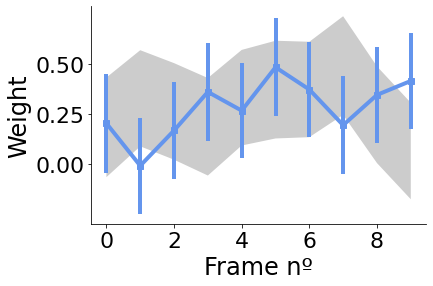

In [123]:
rats_half = [0,3]
divided_time_PK([6],results_divided_sigma_nocoh,results_divided_sigma_nocoh_fit,sigma_lists,rats,directory_images)

25238 25238
Optimization terminated successfully.
         Current function value: 0.489614
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.491657
         Iterations 6
5016 5016
Optimization terminated successfully.
         Current function value: 0.500965
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.565323
         Iterations 6
17869 17869
Optimization terminated successfully.
         Current function value: 0.479063
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.485274
         Iterations 6
7374 7374
Optimization terminated successfully.
         Current function value: 0.505840
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558893
         Iterations 6
3659 3659
Optimization terminated successfully.
         Current function value: 0.476443
         Iterations 7
Optimization terminated succ

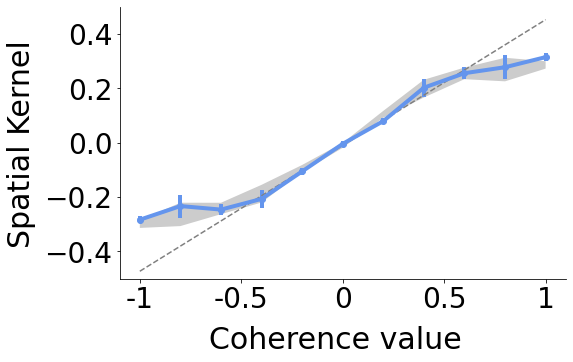

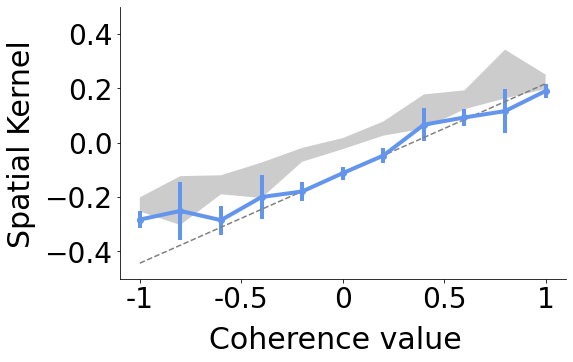

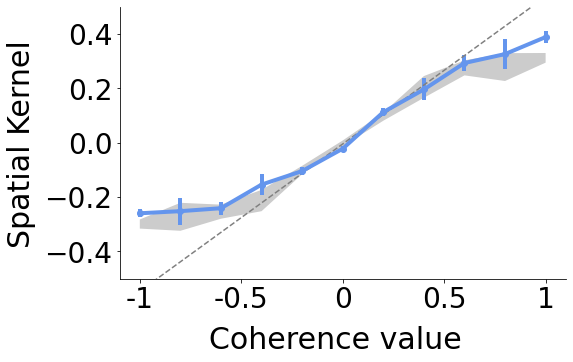

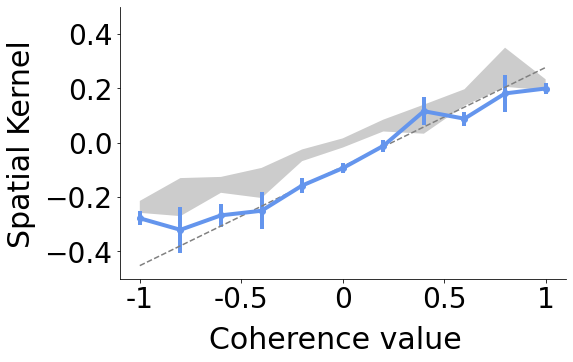

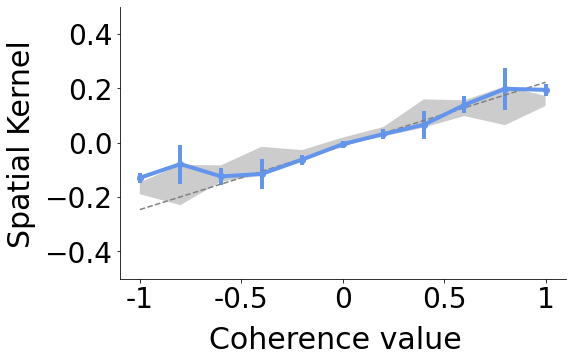

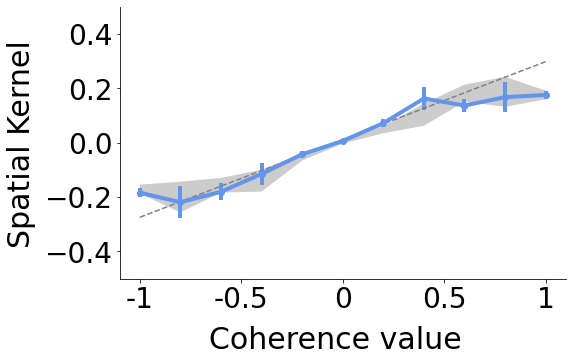

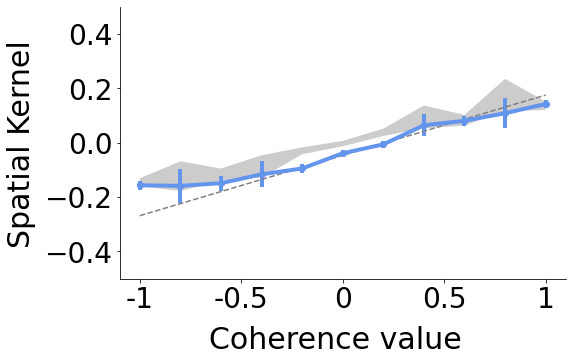

In [124]:
# Spatial Kernel for all sigmas for each rat

# For each stimulus, how many stimulus are from -1 to -0.9, etc to get a transformed stimulus, then make a logistic regression
color = [0,"maroon","brown","red","orangered","orange","yellow"]

new_transf_stim = rf.transformed_stimulus(stimulus)
# new_transf_sec_stim  = rf.transformed_stimulus([stimulus[0],stimulus[3]])
new_dec_half = choices
# new_dec_sec = [choices[0],choices[3]]
new_dec_half_fit = choices_fit
# new_dec_sec_fit = [choices_fit[0],choices_fit[3]]

 
for rat in [0,1,2,3,4,5,6]:
#     try:
    rats_half = [0,1,2,3,4,5,6]

    fig, axs = plt.subplots(figsize = (8,5))
    plt.xticks([0,2.5,5,7.5,10],["-1","-0.5","0","0.5","1"])
    print(len(new_dec_half[rat]),len(new_transf_stim[rat]))
    logit_mod = sm.Logit(new_dec_half[rat], new_transf_stim[rat])
    result = logit_mod.fit()
    pars_list =result.params
    confidence_interval = result.conf_int()
    conf_int = [[i[0] for i in confidence_interval],[i[1] for i in confidence_interval]]
    conf_int = [pars_list-conf_int[0],conf_int[1]-pars_list]
    x_values = np.arange(0,len(pars_list),1)
    plt.errorbar(x_values,pars_list,conf_int,color = "cornflowerblue",linewidth = 4,marker='o')
    
    slope, intercept = np.polyfit([x_values[4],x_values[5],x_values[6]], [pars_list[4],pars_list[5],pars_list[6]], 1)
    abline_values = [slope * i + intercept for i in x_values]
    plt.plot(x_values, abline_values,'grey', linestyle = "dashed")
    
    logit_mod = sm.Logit(new_dec_half_fit[rat], new_transf_stim[rat])
    result = logit_mod.fit()
    pars_list =result.params
    confidence_interval = result.conf_int()
    conf_int = [[i[0] for i in confidence_interval],[i[1] for i in confidence_interval]]
    x_values = np.arange(0,len(pars_list),1)
    plt.fill_between(x_values,conf_int[0],conf_int[1],alpha=0.4,facecolor='grey', linewidth=4, linestyle='dashdot', antialiased=True,label = "Fitted model")
    

#     fig.suptitle("Spatial Kernel "+rats[rat],fontsize = 18)
    fig.text(0.5, -0.07, "Coherence value", ha='center',fontsize = 30)
    fig.text(-0.07, 0.5, "Spatial Kernel", va='center', rotation='vertical',fontsize = 30)

    plt.xticks(fontsize = 28)
    plt.yticks(fontsize = 28)
    plt.ylim(-0.5,0.5)
    hp.remove_axis(axs)
#     fig.savefig(directory_images+'PK/spatial_PK_'+rats[rats_half[rat]]+'_half_sec.png', bbox_inches = 'tight')
#     except:
#         print("no ha funcionat"+str(rat))

# rats_sec = [0,3]
        
# for rat in range(len(rats_sec)):
# #     try:
# #         print(rat)
#     fig, axs = plt.subplots(figsize = (8,5))

#     plt.xticks([0,2.5,5,7.5,10], ["-1","-0.5","0","0.5","1"])
#     logit_mod = sm.Logit(new_dec_sec[rat], new_transf_sec_stim[rat])
#     result = logit_mod.fit()
#     pars_list =result.params
#     confidence_interval = result.conf_int()
#     conf_int = [[i[0] for i in confidence_interval],[i[1] for i in confidence_interval]]
#     conf_int = [pars_list-conf_int[0],conf_int[1]-pars_list]
#     plt.errorbar(np.arange(0,len(pars_list),1),pars_list,conf_int,marker='o')
#     plt.ylim(-0.5,0.5)

#     x_values = np.arange(0,len(pars_list),1)

#     slope, intercept = np.polyfit([x_values[4],x_values[5],x_values[6]], [pars_list[4],pars_list[5],pars_list[6]], 1)
#     abline_values = [slope * i + intercept for i in x_values]
#     plt.plot(x_values, abline_values,'grey', linestyle = "dashed")
#     plt.ylim(-0.5,0.5)
    
#     logit_mod = sm.Logit(new_dec_sec_fit[rat], new_transf_sec_stim[rat])
#     result = logit_mod.fit()
#     pars_list =result.params
#     confidence_interval = result.conf_int()
#     conf_int = [[i[0] for i in confidence_interval],[i[1] for i in confidence_interval]]
#     x_values = np.arange(0,len(pars_list),1)
#     plt.fill_between(x_values,conf_int[0],conf_int[1],alpha=0.2,facecolor='#089FFF', linewidth=4, linestyle='dashdot', antialiased=True,label = "Fitted model")
    
#     fig.suptitle("Spatial Kernel "+rats[rats_sec[rat]],fontsize = 18)
#     fig.text(0.5, 0.02, "Coherence value", ha='center',fontsize = 16)
#     fig.text(0.03, 0.5, "Spatial Kernel", va='center', rotation='vertical',fontsize = 18)

#     hp.remove_axis(axs)
#     fig.savefig(directory_images+'PK/spatial_PK_'+rats[rats_sec[rat]]+'_sec.png', bbox_inches = 'tight')
# #     except:
# #         print("no ha funcionat"+str(rat))
